<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/Masters-Project---Machine-Learning/blob/main/GFA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

from collections import OrderedDict
!pip install ordered-set
from ordered_set import OrderedSet
import math
import time
from joblib import dump, load

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

import sklearn.metrics as metrics
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
!pip install pymatgen
from pymatgen.core.composition import Composition
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8218 sha256=9248e520f9d23b7c5afd8ffae006681b26c38c9ffea0d6a5ad873da4b579333f
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built ordered-set
     |████████████████████████████████| 3.3MB 9.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 20.6MB 23.9MB/s 
     |████████████████████████████████| 112kB 44.5MB/s 
     |████████████████████████████████| 28.5MB 123kB/s 
     |████████████████████████████████| 256kB 40.6MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
   

     |████████████████████████████████| 69.2MB 44kB/s 


# Preliminary data processing

## Read data

In [ ]:
as_read_elemental_properties_data_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Elemental Properties Data.xlsx',
                                                     index_col=0)

as_read_GFA_data_df = pd.read_csv('/content/drive/MyDrive/DDP/As received data/GFA Dataset.csv')

as_read_mixing_enthalpy_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Enthalpy of mixing.xlsx', index_col=0)

display(as_read_elemental_properties_data_df)
print(as_read_elemental_properties_data_df.shape)

display(as_read_GFA_data_df)

display(as_read_mixing_enthalpy_df)

,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,P,VEC,sVEC,pVEC,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
Element,,,,,,,,,,,,,,,,,,,,,,,
Ag,1.30400,7.576,21.45411,1234.9300,107.87000,47,0.1445,0.145,11,5,11,1,0,10,1.93,1.83,25.350,429.000,4.64,10.500,11.300,18.005,2435.15
Al,0.43280,5.986,18.82883,933.4700,26.98154,13,0.1432,0.121,13,3,3,2,1,0,1.61,1.37,24.200,237.000,4.19,2.700,10.790,16.472,2792.15
Au,2.30900,9.226,20.52132,1337.3300,196.97000,79,0.1442,0.136,11,6,11,1,0,10,2.54,2.33,25.418,317.000,5.32,19.300,12.550,18.145,3129.15
B,0.28000,8.298,25.15521,2349.1500,10.81000,5,0.0820,0.084,13,2,3,2,1,0,2.04,1.77,11.087,27.000,4.75,2.340,50.200,86.991,4200.15
Ba,0.14500,5.212,10.00363,1000.1500,137.33000,56,0.2176,0.215,2,6,2,2,0,0,0.89,1.17,28.070,18.400,2.35,3.620,7.750,63.643,2170.15
Be,-0.50000,9.322,18.21112,1560.1500,9.01220,4,0.1128,0.096,2,2,2,2,0,0,1.57,2.01,16.443,200.000,5.08,1.850,12.200,15.788,2742.15
C,1.26200,11.260,24.38306,3823.1500,12.01070,6,0.0773,0.076,14,2,4,2,2,0,2.55,2.51,8.517,129.000,5.00,2.200,117.000,45.803,4300.15
Ca,0.02500,6.113,11.87128,1115.1500,40.07800,20,0.1976,0.176,2,4,2,2,0,0,1.00,1.32,25.929,200.000,2.71,1.540,8.540,41.692,1757.15
Ce,0.57000,5.539,10.88252,1068.1500,140.11600,58,0.1825,0.204,3,6,3,2,0,1,1.12,1.31,26.940,11.400,2.80,6.770,5.460,26.296,3716.15


(55, 23)


,Alloy Formula,Phase Formation
0,Ag27Cu73,CRA
1,Ag35Ca65,BMG
2,Ag42Fe58,CRA
3,Ag48Cu52,CRA
4,Ag48Fe52,CRA
...,...,...
6466,Fe30Cr30Mo15C15B10,BMG
6467,Fe71.2C7.0Si3.3B5.5P8.7Cr2.3Al2.0,BMG
6468,Fe68.7C7.0Si3.3B5.5P8.7Cr2.3Al2.0Mo2.5,BMG
6469,Fe66.7C7.0Si3.3B5.5P8.7Cr2.3Al2.0Mo4.5,BMG


,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,H,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,Li,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,Be,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,B,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,C,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,Pb,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,Bi,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,Th,4,0


In [ ]:
as_read_elemental_properties_data_df.dtypes.value_counts()

float64    16
int64       7
dtype: int64

## Changing data type

### Enthalpy of mixing data

In [ ]:
# Replace all diagonal values with null to change data type of dataframe to numeric
for column_name in as_read_mixing_enthalpy_df.columns:
    as_read_mixing_enthalpy_df.loc[as_read_mixing_enthalpy_df[column_name].apply(lambda x: str(x).isalpha()), column_name] = np.nan

display(as_read_mixing_enthalpy_df.isnull().any().value_counts())
display(as_read_mixing_enthalpy_df)
mixing_enthalpy_df = as_read_mixing_enthalpy_df.astype('float64')

mixing_enthalpy_df.info()

True    73
dtype: int64

,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,NaN,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,NaN,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,NaN,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,NaN,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,NaN,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,NaN,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,NaN,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,NaN,4,0


<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, H to Pu
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       72 non-null     float64
 1   Li      72 non-null     float64
 2   Be      72 non-null     float64
 3   B       72 non-null     float64
 4   C       72 non-null     float64
 5   N       72 non-null     float64
 6   Na      72 non-null     float64
 7   Mg      72 non-null     float64
 8   Al      72 non-null     float64
 9   Si      72 non-null     float64
 10  P       72 non-null     float64
 11  K       72 non-null     float64
 12  Ca      72 non-null     float64
 13  Sc      72 non-null     float64
 14  Ti      72 non-null     float64
 15  V       72 non-null     float64
 16  Cr      72 non-null     float64
 17  Mn      72 non-null     float64
 18  Fe      72 non-null     float64
 19  Co      72 non-null     float64
 20  Ni      72 non-null     float64
 21  Cu      72 non-null     float64
 22  Zn      7

## Data preparation

### Pymatgen trial

In [ ]:
compositions = Composition('Al40Cu60T')
print(np.array(list(compositions.as_dict().keys())))
print(np.array(list(compositions.as_dict().values())))

['Al' 'Cu' 'T0+']
[40. 60.  1.]


### Function to calculate enthalpy of mixing for alloy

In [ ]:
def calculate_H_mix_for_alloy(element_names_list, atomic_fractions_list):
    """
    - Tejas Chaudhari
    """

    # Initiate list to store fractional enthalpies for binary combinations
    fractional_H_mix_for_alloy_list = []

    for i, left_element_name in enumerate(element_names_list):
        for j, right_element_name in enumerate(element_names_list):
            if left_element_name == right_element_name:
                continue
            else:
                print('Elements:', left_element_name, right_element_name)
                # Get binary enthalpy of mixing
                delta_H_mix = mixing_enthalpy_df.loc[left_element_name, right_element_name]
                print(delta_H_mix)

                # Show current atomic fractions
                print('Atomic fractions:', atomic_fractions_list[i], atomic_fractions_list[j])

                # Get fractional delta_H_mix
                fractional_delta_H_mix = delta_H_mix * atomic_fractions_list[i] * atomic_fractions_list[j]

                # Append
                fractional_H_mix_for_alloy_list.append(fractional_delta_H_mix)

    print('Fractional H_mix:', fractional_H_mix_for_alloy_list)

    H_mix_for_alloy = 4 * np.sum(fractional_H_mix_for_alloy_list)

    print('H_mix for alloy:', H_mix_for_alloy)

    return H_mix_for_alloy

### Data calculations

In [ ]:
# # Record start time
# start_time = time.time()

# # Create list of column names
# GFA_data_column_names_list = ['Alloy formula']
# for column_name in elemental_properties_data_df.columns:

#     if column_name in ['sVEC', 'pVEC', 'dVEC']:
#         GFA_data_column_names_list.append(column_name+'_1')
#         GFA_data_column_names_list.append('f_'+column_name)
#     else:
#         GFA_data_column_names_list.append(column_name+'_1')
#         GFA_data_column_names_list.append(column_name+'_2')
#         GFA_data_column_names_list.append(column_name+'_D')
#         GFA_data_column_names_list.append(column_name+'_d')

# GFA_data_column_names_list = GFA_data_column_names_list + ['H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mis', 'PHS_mix', 'PHSS', 'V_mm', 'V_mc']
    
# # Initiate the dataframe to store all the data
# GFA_data_df = pd.DataFrame(columns=GFA_data_column_names_list, dtype='float64')  # Columns are added initially to verify if we have left any property while calculation later

# # Add alloy formula (id) and target columns
# GFA_data_df['Alloy formula'] = as_read_GFA_data_df['Alloy Formula']
# GFA_data_df['Phase formation'] = as_read_GFA_data_df['Phase Formation']

# for row_index, alloy_formula_string in enumerate(GFA_data_df['Alloy formula']):
#     print('Index:')
#     print(row_index)

#     if alloy_formula_string == 'Al40Cu60T': # No element 'T'
#         continue

#     if '[' in alloy_formula_string: # Skip alloy formulae with multiple brackets
#         continue

#     compositions = Composition(alloy_formula_string)
    

#     element_names_list = list(compositions.as_dict().keys())
#     atoms_array = np.array(list(compositions.as_dict().values()))


#     print('Elements:') 
#     print(element_names_list)
#     print('Number of atoms:')
#     print(atoms_array)
#     print('Sum of atoms:')
#     print(np.sum(atoms_array))
    
#     # Get atomic fractions
#     atomic_fractions_list = atoms_array / np.sum(atoms_array)
#     print('Atomic fractions:')
#     print(atomic_fractions_list)

#     for selected_elemental_property_name in elemental_properties_data_df.columns: # Loop over elemental properties

#         # Initialize list to store elemental properties
#         elemental_property_values_list = np.array([], dtype='f')

#         # Get elemental properties for the alloy
#         for i, element_name in enumerate(element_names_list): # Loop over element names
#             elemental_property = elemental_properties_data_df.loc[element_name, selected_elemental_property_name]
#             elemental_property_values_list = np.append(elemental_property_values_list, elemental_property)

#         print(f'{selected_elemental_property_name}: {elemental_property_values_list}')

#         if selected_elemental_property_name in ['sVEC', 'pVEC', 'dVEC']:
#             GFA_data_df[selected_elemental_property_name+'_1'][row_index] = np.sum(atomic_fractions_list * elemental_property_values_list)
#         else:
#             # Elemental properties calculations for all aloys
#             GFA_data_df[selected_elemental_property_name+'_1'][row_index] = np.sum(atomic_fractions_list * elemental_property_values_list)
#             GFA_data_df[selected_elemental_property_name+'_2'][row_index] = np.sum(atomic_fractions_list / elemental_property_values_list)
#             GFA_data_df[selected_elemental_property_name+'_D'][row_index] = np.sqrt(np.sum(atomic_fractions_list * (elemental_property_values_list - GFA_data_df[selected_elemental_property_name+'_1'][row_index])**2))
#             GFA_data_df[selected_elemental_property_name+'_d'][row_index] = np.sqrt(np.sum(atomic_fractions_list * (1 - elemental_property_values_list/GFA_data_df[selected_elemental_property_name+'_1'][row_index])**2))
        
#         # Atomic volume calculations
#         if selected_elemental_property_name == 'Rm (nm)':
#             GFA_data_df['V_mm'][row_index] = np.sum(atomic_fractions_list * 4 / 3 * np.pi * elemental_property_values_list**3)
#         elif selected_elemental_property_name == 'Rc (nm)':
#             GFA_data_df['V_mc'][row_index] = np.sum(atomic_fractions_list * 4 / 3 * np.pi * elemental_property_values_list**3)

#     # Enthalpy of mixing calculation
#     GFA_data_df['H_mix'][row_index] = calculate_H_mix_for_alloy(element_names_list, atomic_fractions_list)

#     # Entropy of mixing calculation
#     GFA_data_df['S_mix/R'][row_index] = - np.sum(atomic_fractions_list * np.log(atomic_fractions_list))

#     print('--'*50, '\n')

# # Entropy of mixing calculations
# GFA_data_df['S_mis/k_B'] = GFA_data_df['Rm (nm)'+'_d']**2 / 21.92

# # Other thermodynamic calculations
# GFA_data_df['PHS_mis'] = GFA_data_df['H_mix'] * GFA_data_df['S_mis/k_B']
# GFA_data_df['PHS_mix'] = GFA_data_df['H_mix'] * GFA_data_df['S_mix/R']
# GFA_data_df['PHSS'] = GFA_data_df['H_mix'] * GFA_data_df['S_mis/k_B'] * GFA_data_df['S_mix/R']

# # Valence electron distribution calculation
# GFA_data_df['f_sVEC'] = GFA_data_df['sVEC_1'] / GFA_data_df['VEC_1'] 
# GFA_data_df['f_pVEC'] = GFA_data_df['pVEC_1'] / GFA_data_df['VEC_1'] 
# GFA_data_df['f_dVEC'] = GFA_data_df['dVEC_1'] / GFA_data_df['VEC_1'] 

# display(GFA_data_df)

# # Save
# GFA_data_df.to_csv('/content/drive/MyDrive/DDP/Stored data/GFA_data_df.csv')

# # Display time alapsed
# print(f'Time elapsed: {(time.time() - start_time)/60:.3f} minutes.')

In [ ]:
# Load GFA data
GFA_data_df = pd.read_csv('/content/drive/MyDrive/DDP/Stored data/GFA/GFA_data_df.csv', index_col=0)

# Display
GFA_data_df

,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Phase formation
0,Ag27Cu73,1.254360,0.797670,0.030189,0.024067,7.685500,0.130125,0.066594,0.008665,20.605967,0.048559,0.515810,0.025032,1324.6032,0.000756,54.535980,0.041172,75.513480,0.013991,19.678059,0.260590,33.860,0.030917,7.991270,0.236009,0.132309,7.580562,0.007414,0.056036,0.135510,7.392372,0.005771,0.042591,11.000,0.090909,0.000000,0.000000,4.270,0.236500,0.443959,0.103972,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.90810,0.524107,0.013319,0.006980,1.84460,0.542136,0.008879,0.004814,24.68570,0.040520,0.404003,0.016366,408.560000,0.002450,12.430865,0.030426,4.68380,0.213509,0.026638,0.005687,9.375800,0.107188,0.683698,0.072922,12.577500,0.079833,0.776929,0.061771,13.527910,0.076485,2.722803,0.201273,2727.150,0.000368,177.583783,0.065117,3.153600,0.583259,0.000143,0.000452,1.839365,0.000263,0.009795,0.010481,CRA
1,Ag35Ca65,0.472650,26.268405,0.610044,1.290689,6.625050,0.152529,0.697807,0.105328,15.225270,0.071068,4.570719,0.300206,1157.0730,0.000866,57.131419,0.049376,63.805200,0.019463,32.334723,0.506773,29.450,0.039947,12.878179,0.437290,0.179015,5.711619,0.025327,0.141480,0.165150,6.106975,0.014786,0.089531,5.150,0.356818,4.292726,0.833539,4.350,0.232500,0.476970,0.109648,5.150,0.356818,4.292726,0.833539,1.650,0.320388,0.000,0.000000,3.500,0.679612,1.32550,0.831347,0.443582,0.334652,1.49850,0.683681,0.243254,0.162332,25.72635,0.038875,0.276165,0.010735,280.150000,0.004066,109.226039,0.389884,3.38550,0.315283,0.920551,0.271910,4.676000,0.455411,4.273648,0.913954,9.506000,0.107086,1.316436,0.138485,33.401550,0.035030,11.297979,0.338247,1994.450,0.000514,323.385389,0.162143,-50.960000,0.647447,0.000913,-0.046535,-32.993881,-0.030129,0.025430,0.019313,BMG
2,Ag42Fe58,0.636420,4.112936,0.568086,0.892627,7.765660,0.128828,0.161394,0.020783,18.399772,0.055406,2.599128,0.141259,1569.1376,0.000660,284.398283,0.181245,77.695500,0.014279,25.677381,0.330487,34.820,0.031244,10.364729,0.297666,0.132668,7.580225,0.010069,0.075893,0.137460,7.290491,0.006416,0.046677,9.260,0.110682,1.480676,0.159900,4.420,0.229000,0.493559,0.111665,9.260,0.110682,1.480676,0.159900,1.580,0.170626,0.000,0.000000,7.680,0.829374,1.87200,0.534556,0.049356,0.026365,1.74300,0.574746,0.074034,0.042475,25.20500,0.039676,0.123390,0.004895,226.696000,0.008211,172.153207,0.759401,4.64580,0.215248,0.004936,0.001062,8.974600,0.113698,1.298059,0.144637,12.750000,0.079197,1.233896,0.096776,14.262260,0.073535,3.184933,0.223312,2840.570,0.000358,344.997397,0.121454,54.566400,0.680292,0.000263,0.014338,37.121085,0.009754,0.009951,0.010951,CRA
3,Ag48Cu52,1.268640,0.788810,0.033973,0.026779,7.654000,0.130663,0.074940,0.009791,20.849953,0.047999,0.580455,0.027840,1298.8068,0.000772,61.370844,0.047252,84.821520,0.012633,22.144263,0.261069,37.640,0.028144,8.992797,0.238916,0.135816,7.390657,0.008343,0.061431,0.138240,7.249739,0.006495,0.046982,11.000,0.090909,0.000000,0.000000,4.480,0.226000,0.499600,0.111518,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.91440,0.522389,0.014988,0.007829,1.84040,0.543376,0.009992,0.005429,24.87680,0.040212,0.454636,0.018275,414.440000,0.002416,13.988796,0.033753,4.67120,0.214087,0.029976,0.006417,9.699200,0.103750,0.769384,0

In [ ]:
# Confirm data types
GFA_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6471 entries, 0 to 6470
Data columns (total 96 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Alloy formula     6471 non-null   object 
 1   Eea (ev)_1        6447 non-null   float64
 2   Eea (ev)_2        6447 non-null   float64
 3   Eea (ev)_D        6447 non-null   float64
 4   Eea (ev)_d        6447 non-null   float64
 5   I1 (ev)_1         6447 non-null   float64
 6   I1 (ev)_2         6447 non-null   float64
 7   I1 (ev)_D         6447 non-null   float64
 8   I1 (ev)_d         6447 non-null   float64
 9   I2 (ev)_1         6447 non-null   float64
 10  I2 (ev)_2         6447 non-null   float64
 11  I2 (ev)_D         6447 non-null   float64
 12  I2 (ev)_d         6447 non-null   float64
 13  Tm (K)_1          6447 non-null   float64
 14  Tm (K)_2          6447 non-null   float64
 15  Tm (K)_D          6447 non-null   float64
 16  Tm (K)_d          6447 non-null   float64


## Missing values

In [ ]:
# Missing rows due to multiple brackets in the data
GFA_data_df.isnull().any(axis=1).value_counts()

False    6447
True       24
dtype: int64

In [ ]:
# Display rows with missing values
display(GFA_data_df.loc[GFA_data_df.isnull().any(axis=1),:])
print('--'*100)

# Drop rows with missing values
imputed_GFA_data_df = GFA_data_df.drop(index=GFA_data_df.loc[GFA_data_df.isnull().any(axis=1),:].index, inplace=False)

# Display
display(imputed_GFA_data_df)
print('--'*100)

# Confirm imputation
imputed_GFA_data_df.isnull().any().value_counts()

,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Phase formation
29,Al40Cu60T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRA
5937,[(Co0.6Fe0.4)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5938,[(Co0.7Fe0.3)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5939,[(Co0.8Fe0.2)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5940,[(Co0.9Fe0.1)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5941,[(Fe0.5Co0.5)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5942,[(Fe0.5Co0.5)72Mo4B24]94Dy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMG
5943,[(Fe0.6Co0.4)0.75B0.2Si0.05]96Nb4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Phase formation
0,Ag27Cu73,1.254360,0.797670,0.030189,0.024067,7.685500,0.130125,0.066594,0.008665,20.605967,0.048559,0.515810,0.025032,1324.6032,0.000756,54.535980,0.041172,75.513480,0.013991,19.678059,0.260590,33.860,0.030917,7.991270,0.236009,0.132309,7.580562,0.007414,0.056036,0.135510,7.392372,0.005771,0.042591,11.000,0.090909,0.000000,0.000000,4.270,0.236500,0.443959,0.103972,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.90810,0.524107,0.013319,0.006980,1.84460,0.542136,0.008879,0.004814,24.68570,0.040520,0.404003,0.016366,408.560000,0.002450,12.430865,0.030426,4.68380,0.213509,0.026638,0.005687,9.375800,0.107188,0.683698,0.072922,12.577500,0.079833,0.776929,0.061771,13.527910,0.076485,2.722803,0.201273,2727.150,0.000368,177.583783,0.065117,3.153600,0.583259,0.000143,0.000452,1.839365,0.000263,0.009795,0.010481,CRA
1,Ag35Ca65,0.472650,26.268405,0.610044,1.290689,6.625050,0.152529,0.697807,0.105328,15.225270,0.071068,4.570719,0.300206,1157.0730,0.000866,57.131419,0.049376,63.805200,0.019463,32.334723,0.506773,29.450,0.039947,12.878179,0.437290,0.179015,5.711619,0.025327,0.141480,0.165150,6.106975,0.014786,0.089531,5.150,0.356818,4.292726,0.833539,4.350,0.232500,0.476970,0.109648,5.150,0.356818,4.292726,0.833539,1.650,0.320388,0.000,0.000000,3.500,0.679612,1.32550,0.831347,0.443582,0.334652,1.49850,0.683681,0.243254,0.162332,25.72635,0.038875,0.276165,0.010735,280.150000,0.004066,109.226039,0.389884,3.38550,0.315283,0.920551,0.271910,4.676000,0.455411,4.273648,0.913954,9.506000,0.107086,1.316436,0.138485,33.401550,0.035030,11.297979,0.338247,1994.450,0.000514,323.385389,0.162143,-50.960000,0.647447,0.000913,-0.046535,-32.993881,-0.030129,0.025430,0.019313,BMG
2,Ag42Fe58,0.636420,4.112936,0.568086,0.892627,7.765660,0.128828,0.161394,0.020783,18.399772,0.055406,2.599128,0.141259,1569.1376,0.000660,284.398283,0.181245,77.695500,0.014279,25.677381,0.330487,34.820,0.031244,10.364729,0.297666,0.132668,7.580225,0.010069,0.075893,0.137460,7.290491,0.006416,0.046677,9.260,0.110682,1.480676,0.159900,4.420,0.229000,0.493559,0.111665,9.260,0.110682,1.480676,0.159900,1.580,0.170626,0.000,0.000000,7.680,0.829374,1.87200,0.534556,0.049356,0.026365,1.74300,0.574746,0.074034,0.042475,25.20500,0.039676,0.123390,0.004895,226.696000,0.008211,172.153207,0.759401,4.64580,0.215248,0.004936,0.001062,8.974600,0.113698,1.298059,0.144637,12.750000,0.079197,1.233896,0.096776,14.262260,0.073535,3.184933,0.223312,2840.570,0.000358,344.997397,0.121454,54.566400,0.680292,0.000263,0.014338,37.121085,0.009754,0.009951,0.010951,CRA
3,Ag48Cu52,1.268640,0.788810,0.033973,0.026779,7.654000,0.130663,0.074940,0.009791,20.849953,0.047999,0.580455,0.027840,1298.8068,0.000772,61.370844,0.047252,84.821520,0.012633,22.144263,0.261069,37.640,0.028144,8.992797,0.238916,0.135816,7.390657,0.008343,0.061431,0.138240,7.249739,0.006495,0.046982,11.000,0.090909,0.000000,0.000000,4.480,0.226000,0.499600,0.111518,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.91440,0.522389,0.014988,0.007829,1.84040,0.543376,0.009992,0.005429,24.87680,0.040212,0.454636,0.018275,414.440000,0.002416,13.988796,0.033753,4.67120,0.214087,0.029976,0.006417,9.699200,0.103750,0.769384,0

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


False    96
dtype: int64

## Unique values

In [ ]:
imputed_GFA_data_df.nunique().sort_values()

Phase formation       3
pVEC_1              411
sVEC_1              505
P_1                 948
P_2                1299
                   ... 
D_2                6441
LP_d               6441
Tm (K)_d           6442
I2 (ev)_d          6443
Alloy formula      6447
Length: 96, dtype: int64

Observations:
1. All features are continuous numerical.

## Separate X and y data

In [ ]:
# Input data
imputed_X_data_df = imputed_GFA_data_df.iloc[:, 1:-1]
display(imputed_X_data_df)

# Target data
y_data_series = imputed_GFA_data_df['Phase formation']

# Display
display(y_data_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
0,1.254360,0.797670,0.030189,0.024067,7.685500,0.130125,0.066594,0.008665,20.605967,0.048559,0.515810,0.025032,1324.6032,0.000756,54.535980,0.041172,75.513480,0.013991,19.678059,0.260590,33.860,0.030917,7.991270,0.236009,0.132309,7.580562,0.007414,0.056036,0.135510,7.392372,0.005771,0.042591,11.000,0.090909,0.000000,0.000000,4.270,0.236500,0.443959,0.103972,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.90810,0.524107,0.013319,0.006980,1.84460,0.542136,0.008879,0.004814,24.68570,0.040520,0.404003,0.016366,408.560000,0.002450,12.430865,0.030426,4.68380,0.213509,0.026638,0.005687,9.375800,0.107188,0.683698,0.072922,12.577500,0.079833,0.776929,0.061771,13.527910,0.076485,2.722803,0.201273,2727.150,0.000368,177.583783,0.065117,3.153600,0.583259,0.000143,0.000452,1.839365,0.000263,0.009795,0.010481
1,0.472650,26.268405,0.610044,1.290689,6.625050,0.152529,0.697807,0.105328,15.225270,0.071068,4.570719,0.300206,1157.0730,0.000866,57.131419,0.049376,63.805200,0.019463,32.334723,0.506773,29.450,0.039947,12.878179,0.437290,0.179015,5.711619,0.025327,0.141480,0.165150,6.106975,0.014786,0.089531,5.150,0.356818,4.292726,0.833539,4.350,0.232500,0.476970,0.109648,5.150,0.356818,4.292726,0.833539,1.650,0.320388,0.000,0.000000,3.500,0.679612,1.32550,0.831347,0.443582,0.334652,1.49850,0.683681,0.243254,0.162332,25.72635,0.038875,0.276165,0.010735,280.150000,0.004066,109.226039,0.389884,3.38550,0.315283,0.920551,0.271910,4.676000,0.455411,4.273648,0.913954,9.506000,0.107086,1.316436,0.138485,33.401550,0.035030,11.297979,0.338247,1994.450,0.000514,323.385389,0.162143,-50.960000,0.647447,0.000913,-0.046535,-32.993881,-0.030129,0.025430,0.019313
2,0.636420,4.112936,0.568086,0.892627,7.765660,0.128828,0.161394,0.020783,18.399772,0.055406,2.599128,0.141259,1569.1376,0.000660,284.398283,0.181245,77.695500,0.014279,25.677381,0.330487,34.820,0.031244,10.364729,0.297666,0.132668,7.580225,0.010069,0.075893,0.137460,7.290491,0.006416,0.046677,9.260,0.110682,1.480676,0.159900,4.420,0.229000,0.493559,0.111665,9.260,0.110682,1.480676,0.159900,1.580,0.170626,0.000,0.000000,7.680,0.829374,1.87200,0.534556,0.049356,0.026365,1.74300,0.574746,0.074034,0.042475,25.20500,0.039676,0.123390,0.004895,226.696000,0.008211,172.153207,0.759401,4.64580,0.215248,0.004936,0.001062,8.974600,0.113698,1.298059,0.144637,12.750000,0.079197,1.233896,0.096776,14.262260,0.073535,3.184933,0.223312,2840.570,0.000358,344.997397,0.121454,54.566400,0.680292,0.000263,0.014338,37.121085,0.009754,0.009951,0.010951
3,1.268640,0.788810,0.033973,0.026779,7.654000,0.130663,0.074940,0.009791,20.849953,0.047999,0.580455,0.027840,1298.8068,0.000772,61.370844,0.047252,84.821520,0.012633,22.144263,0.261069,37.640,0.028144,8.992797,0.238916,0.135816,7.390657,0.008343,0.061431,0.138240,7.249739,0.006495,0.046982,11.000,0.090909,0.000000,0.000000,4.480,0.226000,0.499600,0.111518,11.000,0.090909,0.000000,0.000000,1.000,0.090909,0.000,0.000000,10.000,0.909091,1.91440,0.522389,0.014988,0.007829,1.84040,0.543376,0.009992,0.005429,24.87680,0.040212,0.454636,0.018275,414.440000,0.002416,13.988796,0.033753,4.67120,0.214087,0.029976,0.006417,9.699200,0.103750,0.769384,0.079324,12.210000,0.082325,0.874300,0.071605,14.815840,0.070460,3.064046,0.206

0       CRA
1       BMG
2       CRA
3       CRA
4       CRA
       ... 
6466    BMG
6467    BMG
6468    BMG
6469    BMG
6470    BMG
Name: Phase formation, Length: 6447, dtype: object

## Encoding

### Target encoding

In [ ]:
# Create target encoder model instance
target_encoder_model = LabelEncoder()

# Fit the encoder on entire target data
fitted_target_encoder_model = target_encoder_model.fit(y_data_series)

# Transform the target data
encoded_y_data_series = pd.Series(fitted_target_encoder_model.transform(y_data_series), index=y_data_series.index)

# Display
encoded_y_data_series

# Show classes
print('[0, 1, 2] is encoded as:', fitted_target_encoder_model.inverse_transform([0, 1, 2]))

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/fitted_target_encoder_model.joblib'
dump(value=fitted_target_encoder_model, filename=save_path)

[0, 1, 2] is encoded as: ['BMG' 'CRA' 'RMG']


['/content/drive/MyDrive/DDP/Stored models/fitted_target_encoder_model.joblib']

In [ ]:
# Set target classses dictionary for plotting with labels (required in classification performance summary function)
target_classes_dict = OrderedDict({
    0: 'BMG',
    1: 'CRA',
    2: 'RMG',
})

# Exploratory data analysis

## Distribution plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

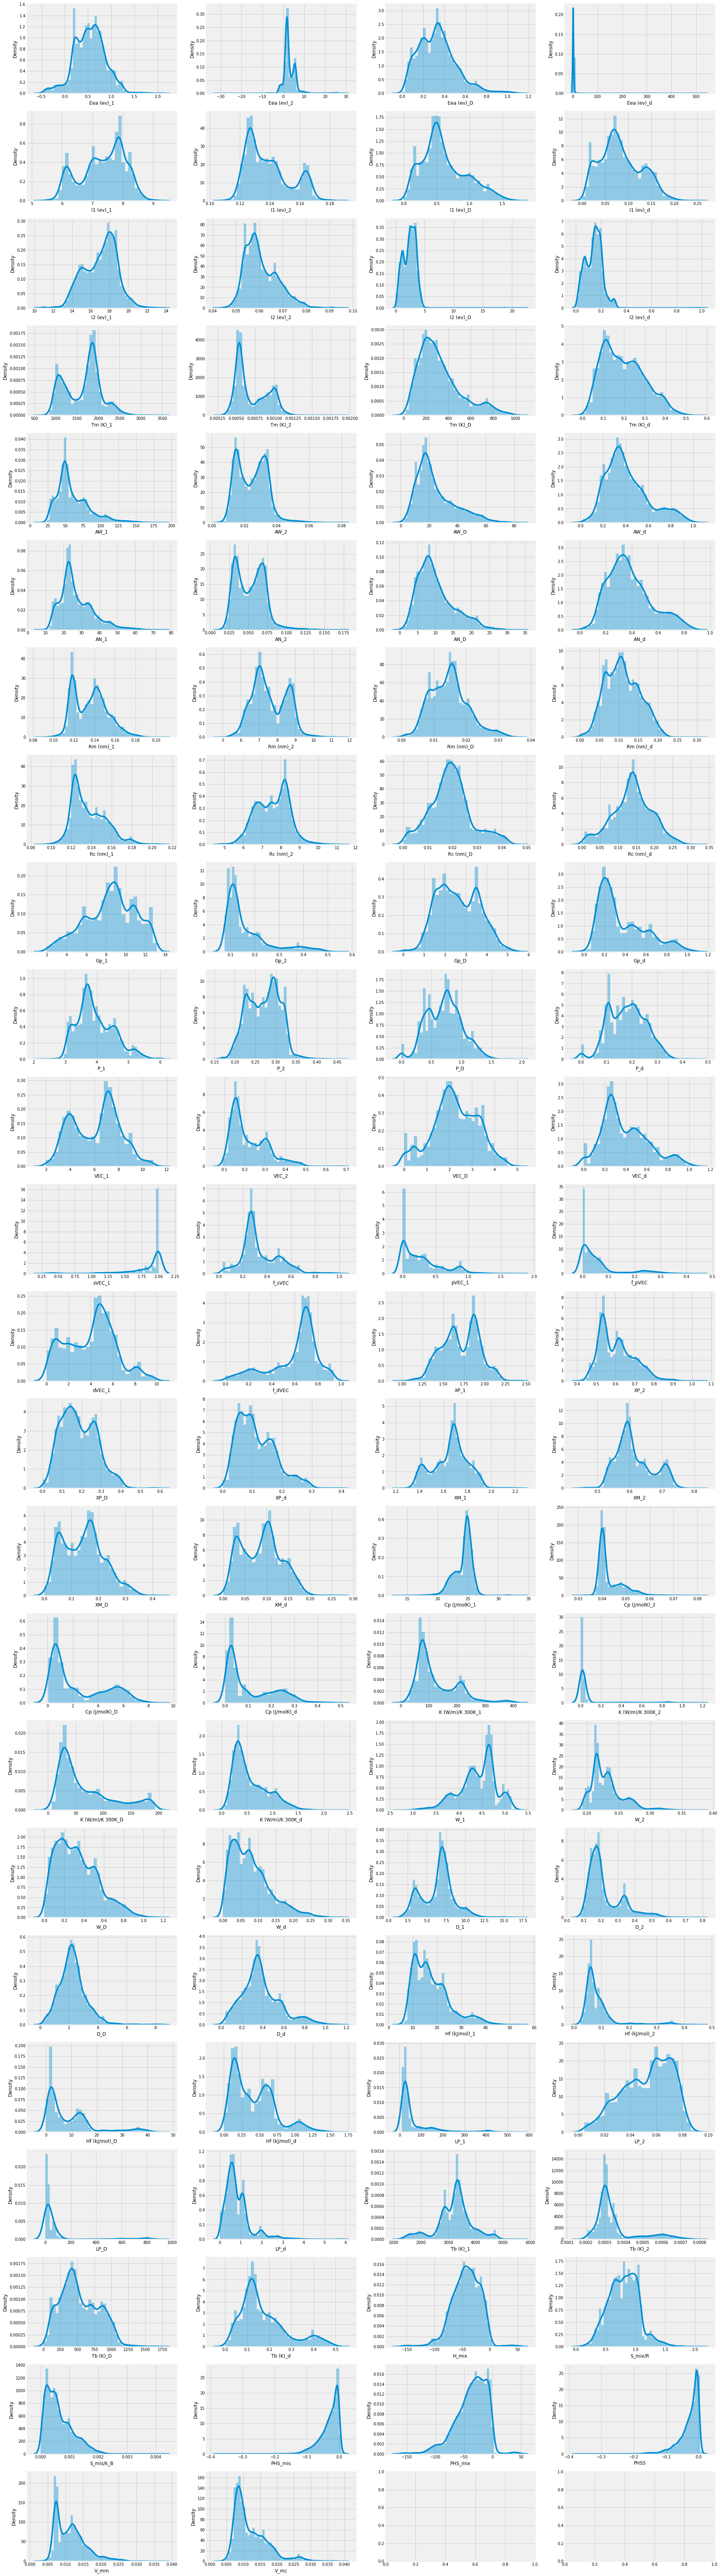

In [ ]:
# Create figure and axes array
n_cols = 4
n_rows = math.ceil(len(imputed_GFA_data_df.select_dtypes(exclude='object').columns) / n_cols)
figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# Initialize axes array row and column indices
i = 0 # Row index of axes array of subplots
j = 0 # Column index of axes array of subplots

# Loop over columns to plot
for column_name in imputed_GFA_data_df.select_dtypes(exclude='object').columns: # 'Id' and 'idhogar' are of 'object' data type
    # Plot in the subplot
    sns.distplot(imputed_GFA_data_df[column_name], ax=axes_array[i][j])

    # Reset column index of axes array of subplots
    j += 1
    if j == n_cols: 
        j = 0
        i += 1

## Scatter plots

In [ ]:
# # Set list of columns to plot
# column_names_to_plot_list = imputed_GFA_data_df.columns[1:-1]

# # Create figure and axes array
# n_combinations = len(column_names_to_plot_list) * (len(column_names_to_plot_list) - 1) / 2
# n_cols = 4
# n_rows = math.ceil(n_combinations / n_cols)
# figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# # Initialize axes array row and column indices
# i = 0 # Row index of axes array of subplots
# j = 0 # Column index of axes array of subplots

# # Loop over columns to plot
# for y_column_name in column_names_to_plot_list: # 'Id' and 'idhogar' are of 'object' data type
#     for x_column_name in column_names_to_plot_list:
#         # Condition which takes x columns only to the left of the y column to avoid duplicate plots
#         if column_names_to_plot_list.index(y_column_name) >= column_names_to_plot_list.index(x_column_name):
#             continue

#         # Plot in the subplot
#         sns.scatterplot(x=imputed_cleaned_encoded_data_v1_df[x_column_name], y=imputed_cleaned_encoded_data_v1_df[y_column_name], ax=axes_array[i][j])

#         # Reset column index of axes array of subplots
#         j += 1
#         if j == n_cols: 
#             j = 0
#             i += 1

## Correlation heatmap

In [ ]:
# Get correlation matrix
GFA_correlation_matrix_df = imputed_GFA_data_df.corr()

# Plot
plt.figure(figsize=(80,85))
sns.heatmap(abs(GFA_correlation_matrix_df), annot=True)

## Target distributions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


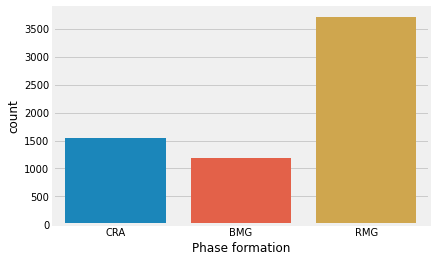

In [ ]:
sns.countplot(imputed_GFA_data_df['Phase formation'])

In [ ]:
imputed_GFA_data_df['Phase formation'].value_counts()

RMG    3708
CRA    1551
BMG    1188
Name: Phase formation, dtype: int64

In [ ]:
# Get column names to plot
column_names_to_plot_list = imputed_GFA_data_df.select_dtypes(exclude='object').columns

# Set mapping dictionary
mapping_dict = {
    'CRA': 'red',
    'BMG': 'yellow',
    'RMG': 'green'
}


# Set number of columns and rows for subplots axes in figure
n_cols = 4
n_rows = math.ceil(len(column_names_to_plot_list) / n_cols)

# Create figure and subplots axes array
figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# Set target column name
target_column_name = 'Phase formation'

# Initilize axes array indices for the loop
i = 0 # Row index
j = 0 # Column index

# Loop for plotting
for current_column_name in column_names_to_plot_list:
    for key, values_list in mapping_dict.items():
        # Get current target level
        current_target_level = key

        # Get current color
        current_color = mapping_dict[key]

        # Get current label
        current_label = key

        # Get data in the current column cirresoibdubg to cyrrebt target kevek
        current_data_to_plot_list = imputed_GFA_data_df.loc[imputed_GFA_data_df[target_column_name]==current_target_level, current_column_name]

        # Plot 
        sns.kdeplot(x=current_data_to_plot_list, color=current_color, label=current_label, ax=axes_array[i][j])        
    
    # Plot customization
    axes_array[i][j].legend(fontsize=13)
    
    # Update the subplots axes indices
    j += 1
    if j == n_cols:
        j = 0 # Reset column index for the next row
        i += 1 # Go to next row 
    

# Feature engineering

Useful resources:
1. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

## Set of all features

In [ ]:
# Initialize dictionary to store feature subsets
selected_feature_subsets_dict = OrderedDict()

# Set of all features
selected_feature_subsets_dict['All'] = OrderedSet(imputed_GFA_data_df.columns[1:-1])

# Display
print(selected_feature_subsets_dict['All'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['All'])}")

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mi

# ML modeling

## Data preprocessing

### Train test split

In [ ]:
# Train test split
imputed_X_train_df, imputed_X_test_df, encoded_y_train_series, encoded_y_test_series = train_test_split(imputed_X_data_df, encoded_y_data_series, test_size=0.15, random_state=7)

# Display
display(imputed_X_train_df)
display(imputed_X_test_df)
display(encoded_y_train_series)
display(encoded_y_test_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
2422,0.388525,5.073378,0.463386,1.192681,8.005825,0.124954,0.153886,0.019222,17.560659,0.058367,3.190890,0.181707,1870.1500,0.000540,206.461619,0.110398,44.231750,0.032194,17.441708,0.394326,20.75,0.068462,7.986708,0.384902,0.116245,8.786210,0.014755,0.126931,0.121125,8.475927,0.017450,0.144068,9.80,0.108413,2.609598,0.266285,3.525,0.302083,0.741198,0.210269,6.55,0.178125,2.108910,0.321971,2.00,0.305344,0.50,0.076336,4.05,0.618321,1.87375,0.534487,0.074555,0.039789,1.74075,0.576275,0.101400,0.058251,22.068625,0.049265,5.020116,0.227478,84.085,0.015154,34.840921,0.414354,4.7000,0.212823,0.077460,0.016481,6.070825,0.225011,2.592889,0.427107,25.69125,0.055363,17.137404,0.667052,28.00165,0.064436,27.086354,0.967313,3364.75,0.000301,381.889827,0.113497,-57.0750,0.854891,0.000735,-0.041951,-48.792925,-0.035863,0.006874,0.007878
1282,0.744280,1.750078,0.428677,0.575963,6.713800,0.151814,0.968821,0.144303,17.849509,0.056286,1.200030,0.067230,1284.2420,0.000866,450.322295,0.350652,29.814034,0.034843,7.410471,0.248556,14.40,0.071749,3.231099,0.224382,0.133000,7.592493,0.012766,0.095985,0.119800,8.380805,0.007808,0.065173,12.60,0.084249,2.244994,0.178174,3.100,0.325000,0.300000,0.096774,3.60,0.291667,0.916515,0.254588,1.90,0.527778,1.20,0.333333,0.50,0.138889,1.70200,0.590807,0.130445,0.076642,1.56300,0.655905,0.259386,0.165954,22.791700,0.044236,1.981418,0.086936,195.970,0.005626,52.405421,0.267416,4.4090,0.227781,0.295176,0.066949,3.033700,0.365019,1.382095,0.455581,23.32900,0.067459,17.909885,0.767709,23.30660,0.052406,11.598859,0.497664,3031.15,0.000334,334.879381,0.110479,-41.0400,0.897946,0.000420,-0.017250,-36.851693,-0.015489,0.010123,0.007296
3243,0.202460,5.953544,0.142842,0.705531,7.835740,0.127874,0.329028,0.041991,16.749838,0.060364,2.125104,0.126873,1872.9500,0.000537,156.333873,0.083469,52.834988,0.022489,10.668366,0.201919,24.58,0.048410,4.976304,0.202453,0.121638,8.302115,0.010017,0.082348,0.129680,7.804977,0.011695,0.090185,8.14,0.125449,1.341790,0.164839,3.880,0.265000,0.474974,0.122416,7.54,0.140833,1.268227,0.168200,1.92,0.254642,0.06,0.007958,5.56,0.737401,1.82900,0.547550,0.070406,0.038494,1.67580,0.597085,0.040254,0.024021,24.119220,0.043101,3.326398,0.137915,78.088,0.013799,13.413943,0.171780,4.6360,0.215760,0.073512,0.015857,7.480600,0.146106,1.313276,0.175558,16.23200,0.068248,8.622748,0.531219,16.07978,0.082050,17.915407,1.114157,3182.91,0.000316,262.091248,0.082343,-12.4736,0.500571,0.000309,-0.003859,-6.243918,-0.001932,0.007676,0.009334
701,0.690030,1.628948,0.271804,0.393902,6.133650,0.165978,0.877987,0.143143,13.613202,0.077848,3.485655,0.256050,1300.9320,0.000797,258.229860,0.198496,107.663004,0.012645,43.417727,0.403274,45.35,0.028024,16.374599,0.361072,0.167605,6.164031,0.028101,0.167660,0.177650,5.982672,0.040005,0.225192,5.75,0.249359,3.832427,0.666509,5.200,0.204167,1.122497,0.215865,4.75,0.275000,3.031089,0.638124,2.00,0.421053,0.10,0.021053,2.65,0.557895,1.35350,0.783911,0.354645,0.262020,1.45000,0.702780,0.214126,0.147673,26.559000,0.037698,0.902003,0.033962,55.150,0.051326,68.923599,1.249748,3.9165,0.263587,0.749175,0.191287,6.492500,0.170818,1.721502,0.265152,9.47650,0.128417,4.808803,0.507445,100.93415,0.033608,64.972609,0.643713,3504.90,0.000288,333.560620,0.09

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4194,1.085270,0.951999,0.171132,0.157686,8.220580,0.123594,1.133565,0.137894,18.763923,0.053402,0.861054,0.045889,1397.8406,0.001114,553.895841,0.396251,53.780310,0.019918,11.515140,0.214114,25.530,0.041745,5.275329,0.206633,0.121296,8.281214,0.007721,0.063650,0.121640,8.257233,0.007781,0.063971,11.130,0.092152,1.962931,0.176364,3.80,0.266667,0.400000,0.105263,9.130,0.118818,2.091196,0.229047,1.87,0.204819,0.60,0.065717,6.660,0.729463,1.9647,0.510531,0.112698,0.057362,1.91390,0.526508,0.178325,0.093174,25.40890,0.039414,0.957730,0.037693,112.9460,0.858775,116.872111,1.034761,5.0815,0.196972,0.148771,0.029277,7.55980,0.182382,2.699973,0.357149,13.53280,0.352727,6.601029,0.487780,410.841070,0.073127,799.745544,1.946606,2613.920,0.000618,1036.873549,0.396674,-37.836800,0.855436,0.000185,-0.006993,-32.366971,-0.005982,0.007563,0.007630
3654,0.792200,1.346312,0.236463,0.298490,8.462120,0.120966,1.421454,0.167978,18.431469,0.055436,2.990018,0.162224,2314.5100,0.000478,835.931714,0.361170,53.990716,0.029441,24.090356,0.446194,24.600,0.061376,10.461357,0.425258,0.116884,8.903384,0.020113,0.172073,0.119360,8.807625,0.023452,0.196480,9.640,0.109841,2.381260,0.247019,3.72,0.294000,0.917388,0.246610,7.640,0.145556,2.056794,0.269214,1.88,0.246073,0.40,0.052356,5.360,0.701571,2.0476,0.495689,0.266643,0.130222,1.90240,0.537033,0.306624,0.161177,21.46140,0.055878,6.476631,0.301780,110.3600,0.009220,15.301974,0.138655,4.7120,0.212588,0.192499,0.040853,7.68880,0.179423,2.777568,0.361249,38.24920,0.047461,39.697829,1.037873,25.922240,0.043046,10.120566,0.390420,3625.590,0.000283,642.428273,0.177193,-61.824000,0.838570,0.001351,-0.083511,-51.843733,-0.070030,0.007236,0.007901
5675,0.293958,4.838588,0.223553,0.760494,7.937476,0.126210,0.319003,0.040189,18.372591,0.056438,3.849280,0.209512,1981.1140,0.000514,291.423072,0.147101,47.328174,0.035320,22.005684,0.464959,21.852,0.076325,10.001305,0.457684,0.115078,8.988770,0.019021,0.165287,0.121228,8.592035,0.022209,0.183200,9.192,0.115239,2.274013,0.247390,3.57,0.307500,0.908350,0.254440,6.792,0.176778,2.265554,0.333562,1.95,0.287102,0.24,0.035336,4.602,0.677562,1.8760,0.534811,0.107089,0.057084,1.71088,0.584970,0.048843,0.028548,21.67070,0.052032,5.949096,0.274523,68.9186,0.018322,25.352905,0.367867,4.6586,0.214794,0.113164,0.024291,6.71838,0.196598,2.485329,0.369930,23.50538,0.056605,15.249430,0.648763,31.456666,0.061160,31.416232,0.998715,3493.512,0.000293,566.998585,0.162300,-45.782368,1.090748,0.001246,-0.057061,-49.937044,-0.062239,0.006877,0.008182
730,0.867464,1.442029,0.354608,0.408787,7.172800,0.140461,0.599088,0.083522,16.732862,0.061127,2.345218,0.140156,1768.6820,0.000595,330.921119,0.187100,65.281394,0.017217,19.355478,0.296493,30.100,0.036621,7.828793,0.260093,0.137170,7.385224,0.016092,0.117311,0.139000,7.379442,0.023584,0.169668,8.500,0.142692,3.074085,0.361657,4.20,0.243333,0.600000,0.142857,7.500,0.168333,3.074085,0.409878,2.00,0.266667,0.10,0.013333,5.400,0.720000,1.7060,0.601812,0.261350,0.153195,1.67600,0.604005,0.179399,0.107040,25.67000,0.038977,0.583884,0.022746,84.9300,0.020253,59.112402,0.696013,4.7090,0.215371,0.542613,0.115229,7.56600,0.150465,1.940042,0.256416,16.63100,0.061364,1.963616,0.118070,22.222700,0.068046,16.304889,0.733704,3595.550

2422    2
1282    2
3243    2
701     2
256     1
       ..
5700    0
2551    1
538     1
1221    2
4272    1
Length: 5479, dtype: int64

4194    1
3654    2
5675    0
730     2
3327    1
       ..
2802    2
3509    1
3599    2
4370    2
5243    2
Length: 968, dtype: int64

### Feature scaling

In [ ]:
# Set the feature range
selected_feature_range_tuple = (0.2, 0.8)

# Create scaler model instance
min_max_scaler_model = MinMaxScaler(feature_range=selected_feature_range_tuple)

# Fit the model on train data
fitted_min_max_scaler_model = min_max_scaler_model.fit(imputed_X_train_df)

# Scale the train data
scaled_imputed_X_train_df = pd.DataFrame(fitted_min_max_scaler_model.transform(imputed_X_train_df), columns=imputed_X_train_df.columns,
                                         index=imputed_X_train_df.index)

# Display
display(scaled_imputed_X_train_df)
print('--'*100)

# Confirm
display(scaled_imputed_X_train_df.agg(['min', 'max']))
print('__'*100)

# Scale the test data
scaled_imputed_X_test_df = pd.DataFrame(fitted_min_max_scaler_model.transform(imputed_X_test_df), columns=imputed_X_test_df.columns,
                                        index=imputed_X_test_df.index)

# Display
display(scaled_imputed_X_test_df)

# Confirm
display(scaled_imputed_X_train_df.agg(['min', 'max']))
print('__'*100)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
2422,0.404839,0.560084,0.451965,0.201320,0.612423,0.322183,0.253000,0.245670,0.518959,0.371584,0.284132,0.305805,0.473559,0.283594,0.324271,0.319693,0.295675,0.415072,0.319328,0.422463,0.313967,0.407012,0.334938,0.448503,0.340139,0.552811,0.441984,0.447671,0.351321,0.543246,0.425786,0.471495,0.622002,0.240865,0.485599,0.348472,0.397561,0.478174,0.426723,0.473354,0.496095,0.291363,0.454344,0.382039,0.800000,0.368997,0.370455,0.304094,0.4430,0.586450,0.571106,0.312599,0.272291,0.259339,0.499855,0.408995,0.343371,0.331367,0.451597,0.423701,0.550903,0.482058,0.310745,0.206614,0.307284,0.305028,0.658184,0.276137,0.240247,0.229924,0.376576,0.324257,0.382796,0.420737,0.450646,0.243100,0.434019,0.449007,0.218658,0.622284,0.218266,0.298613,0.506685,0.308608,0.335364,0.333731,0.487546,0.436073,0.304142,0.712997,0.521219,0.726055,0.263882,0.273396
1282,0.487787,0.527716,0.433084,0.200637,0.404755,0.535118,0.537636,0.547257,0.532614,0.347084,0.230075,0.237295,0.336383,0.409361,0.471695,0.581350,0.244120,0.436500,0.245718,0.335545,0.256463,0.419478,0.247469,0.337584,0.427152,0.442727,0.408801,0.386318,0.344525,0.534247,0.301023,0.322818,0.773490,0.209513,0.445696,0.299344,0.328455,0.525250,0.291766,0.325809,0.304121,0.409484,0.310536,0.343941,0.764706,0.507008,0.609091,0.654545,0.2300,0.286806,0.498218,0.367589,0.328116,0.315922,0.392125,0.541193,0.566751,0.574259,0.472489,0.365032,0.336966,0.306728,0.476446,0.201667,0.361745,0.266775,0.589403,0.323549,0.353368,0.321557,0.256085,0.444887,0.295666,0.436117,0.421225,0.260058,0.444575,0.486624,0.213453,0.537354,0.207785,0.250330,0.457591,0.342197,0.318526,0.330140,0.531855,0.448868,0.259541,0.750880,0.555457,0.757642,0.321437,0.263478
3243,0.361455,0.568657,0.277598,0.200780,0.585085,0.345328,0.314173,0.300569,0.480629,0.395092,0.255193,0.272989,0.474214,0.282362,0.293967,0.290364,0.326439,0.336543,0.269625,0.307735,0.348651,0.330974,0.279568,0.322431,0.368146,0.508168,0.362935,0.359281,0.395196,0.479771,0.351323,0.369953,0.532191,0.262967,0.346848,0.291909,0.455285,0.401997,0.345289,0.359143,0.560521,0.252568,0.352954,0.295098,0.771765,0.337539,0.220455,0.210851,0.5336,0.660875,0.552115,0.325353,0.268147,0.257351,0.460490,0.443543,0.256915,0.254171,0.510845,0.351789,0.431658,0.370326,0.301863,0.205910,0.240847,0.241878,0.643057,0.285446,0.238195,0.228791,0.432506,0.256273,0.290714,0.284866,0.332833,0.261164,0.317661,0.398244,0.205440,0.746637,0.212059,0.313710,0.479924,0.324145,0.292455,0.296657,0.610791,0.330771,0.243818,0.771416,0.643219,0.778661,0.278100,0.298216
701,0.475138,0.526536,0.347749,0.200436,0.311507,0.647402,0.505910,0.544459,0.332351,0.600922,0.292136,0.350297,0.340290,0.382417,0.355567,0.415639,0.522496,0.256895,0.509942,0.427799,0.536739,0.253668,0.489216,0.432037,0.606866,0.310995,0.664623,0.528422,0.641217,0.307372,0.717624,0.624373,0.402885,0.423733,0.619427,0.571623,0.669919,0.277033,0.543358,0.480629,0.378959,0.392145,0.565563,0.560789,0.800000,0.440789,0.234091,0.228708,0.3590,0.548684,0.350318,0.556136,0.552054,0.600546,0.323639,0.619012,0.502757,0.533033,0.581338,0.288763,0.260970,0.240641,0.267892,0.225394,0.412961,0.522511,0.472996,0.437040,0.589257,0.547315,0.393305,0.277565,0.320090,0.333259,0.248694,0.345519,0.265541,0.389359,0.2

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
4194,0.567293,0.519943,0.292987,0.200174,0.646941,0.311398,0.595177,0.531803,0.575841,0.313140,0.220870,0.224523,0.362979,0.504681,0.534310,0.631012,0.329820,0.315744,0.275839,0.315008,0.357254,0.305697,0.285068,0.325319,0.366370,0.506240,0.324629,0.322209,0.353962,0.522556,0.300683,0.320553,0.693959,0.219766,0.414827,0.298335,0.442276,0.405421,0.322355,0.336844,0.663991,0.229665,0.452208,0.329501,0.754118,0.306627,0.404545,0.289615,0.59960,0.655915,0.609704,0.289208,0.310390,0.286319,0.604796,0.326373,0.452137,0.410125,0.548108,0.308780,0.264894,0.245295,0.353488,0.644620,0.561631,0.466542,0.748355,0.225897,0.277298,0.253157,0.435648,0.287529,0.390502,0.382950,0.299215,0.659995,0.290033,0.382010,0.643096,0.683641,0.741165,0.399292,0.396189,0.630452,0.569969,0.670719,0.540706,0.436235,0.226168,0.766609,0.568316,0.772381,0.276097,0.269164
3654,0.498961,0.523783,0.328525,0.200330,0.685764,0.290564,0.695729,0.604341,0.560125,0.337084,0.278678,0.294145,0.577595,0.259712,0.704813,0.592805,0.330572,0.392795,0.368116,0.453391,0.348832,0.380141,0.380454,0.476390,0.343457,0.563616,0.531362,0.537172,0.342269,0.574626,0.503441,0.570266,0.613345,0.242717,0.460609,0.337729,0.429268,0.461569,0.480618,0.520598,0.567028,0.257481,0.448059,0.352211,0.757647,0.332223,0.336364,0.271395,0.52160,0.638482,0.644886,0.274716,0.464155,0.398187,0.597826,0.343846,0.633541,0.563487,0.434052,0.500849,0.653448,0.574753,0.349658,0.203533,0.246701,0.233254,0.661020,0.275392,0.300019,0.274176,0.440766,0.284979,0.396086,0.385165,0.607053,0.232022,0.742321,0.587589,0.216352,0.471277,0.206784,0.239305,0.545072,0.291241,0.428685,0.409530,0.474423,0.431222,0.391412,0.649258,0.512471,0.673084,0.270302,0.273796
5675,0.382789,0.557797,0.321502,0.200841,0.601437,0.332134,0.310671,0.296226,0.557341,0.348878,0.302009,0.322446,0.499538,0.273569,0.375634,0.359665,0.306748,0.440366,0.352819,0.464581,0.323947,0.436831,0.371992,0.498796,0.334078,0.571491,0.513150,0.523718,0.351849,0.554230,0.487358,0.545239,0.589107,0.249721,0.448872,0.337937,0.404878,0.489301,0.477853,0.530777,0.511844,0.289962,0.473236,0.388593,0.782353,0.357679,0.281818,0.248185,0.47612,0.623476,0.572061,0.312916,0.304787,0.285892,0.481751,0.423430,0.269060,0.264382,0.440100,0.455985,0.616307,0.540748,0.288283,0.208259,0.277865,0.292926,0.648399,0.282386,0.258798,0.244105,0.402267,0.299777,0.375056,0.389854,0.423421,0.244842,0.408219,0.442172,0.222488,0.599155,0.221196,0.301842,0.525634,0.300658,0.401667,0.391808,0.518750,0.506168,0.376610,0.689824,0.517938,0.685163,0.263941,0.278573
730,0.516509,0.524716,0.392792,0.200452,0.478530,0.445115,0.408498,0.400707,0.479826,0.404074,0.261170,0.280939,0.449802,0.304808,0.399512,0.403228,0.370946,0.293892,0.333372,0.364128,0.398639,0.286267,0.332034,0.362260,0.448808,0.423613,0.464280,0.428599,0.442995,0.439513,0.505149,0.519739,0.551668,0.285339,0.536433,0.401648,0.507317,0.357489,0.383533,0.385717,0.557918,0.281177,0.570749,0.431741,0.800000,0.345000,0.234091,0.218182,0.52400,0.650000,0.499915,0.378335,0.458869,0.433459,0.460611,0.455031,0.453656,0.441397,0.555652,0.303680,0.238573,0.226649,0.311996,0.209261,0.382541,0.378354,0.660311,0.284214,0.481931,0.409218,0.435894,0.260029,0.335817,0.328541,0.337802,0.251513,0.226660,0.243843

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


### Store final train and test data

In [ ]:
X_train = scaled_imputed_X_train_df
X_test = scaled_imputed_X_test_df
y_train = encoded_y_train_series
y_test = encoded_y_test_series

## Feature selection

Useful resource:
1. https://scikit-learn.org/stable/modules/feature_selection.html

### Based on correlation

In [ ]:
# Calculate correlation matrix
GFA_correlation_matrix_df = X_train.corr(method='pearson')

# Set max allowed correlation
max_allowed_absolute_correlation = 0.75

# Initialize the set to store correlated variables
correlated_features_set = OrderedSet()

# Get correlated variables
for i, diagonal_column_name in enumerate(GFA_correlation_matrix_df.columns):
    for j, left_column_name in enumerate(GFA_correlation_matrix_df.columns):
        if j >= i: # Condition to skip checking duplicates.
            continue
        elif abs(GFA_correlation_matrix_df.iloc[i, j]) >= max_allowed_absolute_correlation:
            print(f'Absolute correlation between {left_column_name} and {diagonal_column_name} is {abs(GFA_correlation_matrix_df.iloc[i, j])}.')
            column_name_to_drop = diagonal_column_name
            print(f'    Adding {column_name_to_drop} to correlated variables set')
            correlated_features_set.add(column_name_to_drop)

# Get features selected based on correlation
selected_feature_subsets_dict['Correlation'] = selected_feature_subsets_dict['All'] - correlated_features_set

# Display
display(selected_feature_subsets_dict['Correlation'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['Correlation'])}")

Absolute correlation between I1 (ev)_1 and I1 (ev)_2 is 0.9918983503047061.
    Adding I1 (ev)_2 to correlated variables set
Absolute correlation between I1 (ev)_D and I1 (ev)_d is 0.9740307019285023.
    Adding I1 (ev)_d to correlated variables set
Absolute correlation between I2 (ev)_1 and I2 (ev)_2 is 0.9704204124218971.
    Adding I2 (ev)_2 to correlated variables set
Absolute correlation between I2 (ev)_D and I2 (ev)_d is 0.9695018565158968.
    Adding I2 (ev)_d to correlated variables set
Absolute correlation between Tm (K)_1 and Tm (K)_2 is 0.9090777858288379.
    Adding Tm (K)_2 to correlated variables set
Absolute correlation between Tm (K)_D and Tm (K)_d is 0.8586688327975259.
    Adding Tm (K)_d to correlated variables set
Absolute correlation between AW_1 and AW_2 is 0.790828045069738.
    Adding AW_2 to correlated variables set
Absolute correlation between AW_1 and AN_1 is 0.9981523538393284.
    Adding AN_1 to correlated variables set
Absolute correlation between AW_2 and

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_D', 'I2 (ev)_1', 'I2 (ev)_D', 'Tm (K)_1', 'Tm (K)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_1', 'Rm (nm)_D', 'Gp_D', 'VEC_1', 'VEC_D', 'sVEC_1', 'pVEC_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'D_D', 'LP_2', 'LP_d', 'Tb (K)_D', 'H_mix', 'S_mix/R'])

----------------------------------------------------------------------------------------------------
Total features in the set: 31


### Based on variance

       Feature names  Variances
0   K (W/m)/K 300K_D   0.024059
1               LP_2   0.017464
2              VEC_1   0.015955
3              VEC_D   0.014231
4          I1 (ev)_D   0.013746
5          I1 (ev)_1   0.013507
6           Tm (K)_D   0.013172
7             sVEC_1   0.013053
8               AW_d   0.012542
9   K (W/m)/K 300K_1   0.011755
10              Gp_D   0.011740
11            pVEC_1   0.010625
12          Tb (K)_D   0.009783
13              AW_D   0.009766
14         Rm (nm)_D   0.009607
15          Tm (K)_1   0.009601
16        Eea (ev)_D   0.009404
17              XP_D   0.007954
18  K (W/m)/K 300K_2   0.007843
19  K (W/m)/K 300K_d   0.007610
20         Rm (nm)_1   0.007098
21              AW_1   0.007044
22         I2 (ev)_1   0.006748
23        Eea (ev)_1   0.005993
24           S_mix/R   0.005706
25             H_mix   0.004994
26               D_D   0.004573
27              LP_d   0.004359
28         I2 (ev)_D   0.001101
29        Eea (ev)_2   0.001093
30      

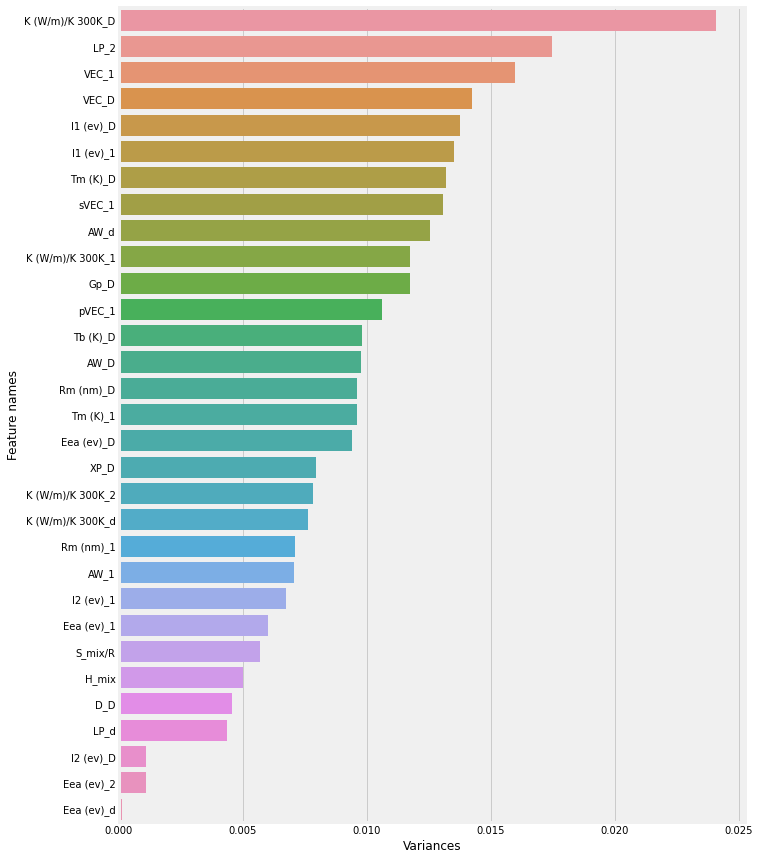

----------------------------------------------------------------------------------------------------


OrderedSet(['Eea (ev)_D', 'I1 (ev)_1', 'I1 (ev)_D', 'Tm (K)_1', 'Tm (K)_D', 'AW_D', 'AW_d', 'Rm (nm)_D', 'Gp_D', 'VEC_1', 'VEC_D', 'sVEC_1', 'pVEC_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'LP_2', 'Tb (K)_D'])

----------------------------------------------------------------------------------------------------
Number of features selected: 19


In [ ]:
# Create variance threshold model instance
variance_threshold_model = VarianceThreshold(threshold=0.0078)

# Fit model on train data
fitted_variance_threshold_model = variance_threshold_model.fit(X_train[selected_feature_subsets_dict['Correlation']])

# Initiate dataframe to store variance threshold results
variance_threshold_results_df = pd.DataFrame()

# Get feature names
variance_threshold_results_df['Feature names'] = X_train[selected_feature_subsets_dict['Correlation']].columns
variance_threshold_results_df['Variances'] = fitted_variance_threshold_model.variances_

# Sort according to variance values
variance_threshold_results_df.sort_values(by='Variances', ascending=False, inplace=True, ignore_index=True)

# Display
print(variance_threshold_results_df.to_string())
print('--'*50)

# Plot
plt.figure(figsize=(10,15))
sns.barplot(data=variance_threshold_results_df, x='Variances', y='Feature names')
plt.show()
print('--'*50)

# Get features selected based on variance threshold
selected_features_indices_boolean_list = fitted_variance_threshold_model.get_support()
selected_feature_subsets_dict['Variance threshold'] = OrderedSet(X_train[selected_feature_subsets_dict['Correlation']].columns[selected_features_indices_boolean_list])

# Display selected features set
display(selected_feature_subsets_dict['Variance threshold'])
print('--'*50)
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

### Based on mutual information

Useful resources
1. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

            Features  Mutual info
0            S_mix/R     0.304396
1               Gp_D     0.187347
2              VEC_D     0.162310
3              VEC_1     0.156830
4   K (W/m)/K 300K_2     0.156479
5          Rm (nm)_D     0.150881
6             sVEC_1     0.143329
7               LP_d     0.141783
8               XP_D     0.140577
9             pVEC_1     0.133164
10         I2 (ev)_D     0.132928
11  K (W/m)/K 300K_D     0.125683
12          Tb (K)_D     0.124005
13             H_mix     0.123873
14  K (W/m)/K 300K_d     0.120247
15              AW_1     0.107351
16        Eea (ev)_2     0.105614
17              AW_D     0.101545
18         Rm (nm)_1     0.099330
19  K (W/m)/K 300K_1     0.094677
20              LP_2     0.090612
21         I1 (ev)_1     0.086789
22          Tm (K)_1     0.083060
23         I2 (ev)_1     0.081225
24         I1 (ev)_D     0.079756
25               D_D     0.076289
26              AW_d     0.075591
27        Eea (ev)_D     0.075399
28        Eea 

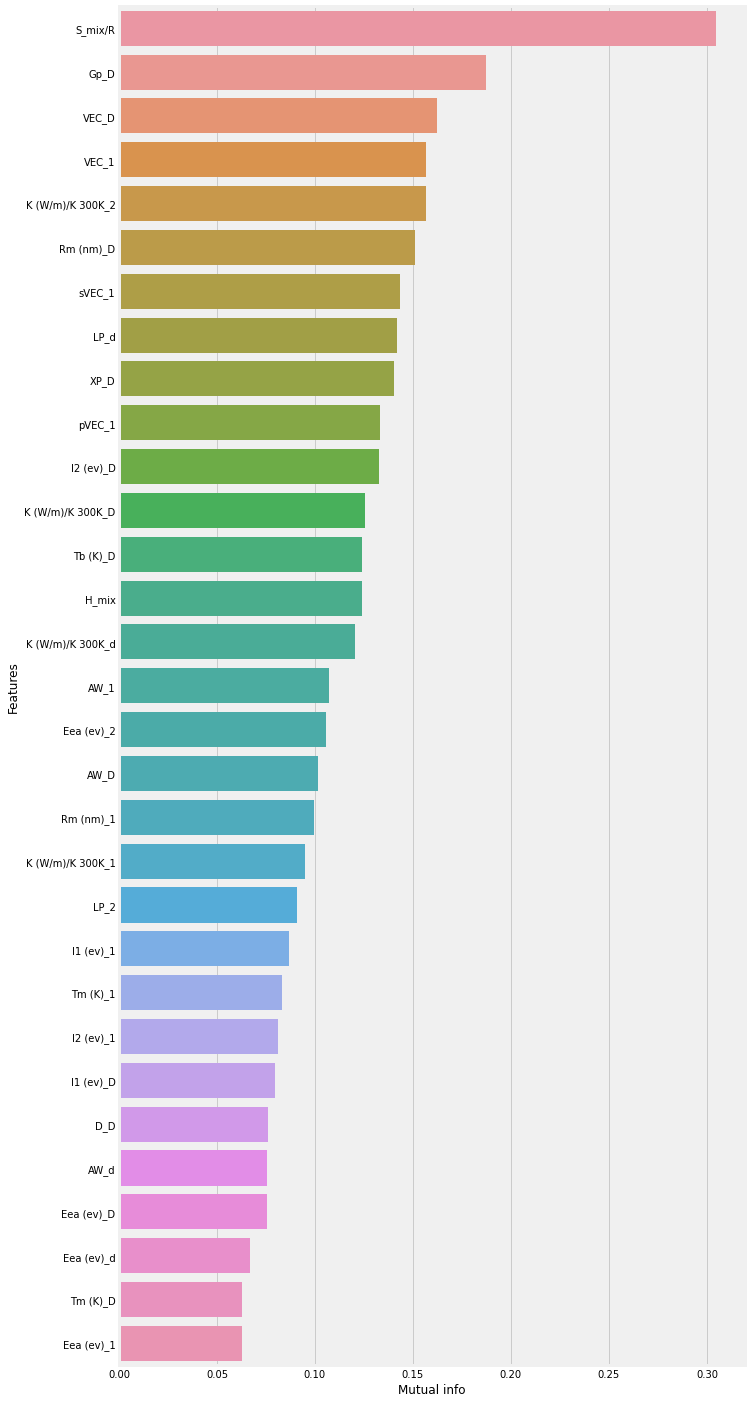

In [ ]:
mutual_info_df = pd.DataFrame()

mutual_info_df['Features'] = X_train[selected_feature_subsets_dict['Correlation']].columns
mutual_info_df['Mutual info'] = mutual_info_classif(X_train[selected_feature_subsets_dict['Correlation']], y_train)

mutual_info_df.sort_values(by='Mutual info', ascending=False, ignore_index=True, inplace=True)

# Display
print(mutual_info_df.to_string())

# Plot
plt.figure(figsize=(10,25))
sns.barplot(data=mutual_info_df, y='Features', x='Mutual info')

In [ ]:
# Set mutual information threshold
minimum_allowed_mutual_info = 0.07

# Get the set of features selected on the basis of mutual gain
selected_feature_subsets_dict['Mutual info'] = OrderedSet(mutual_info_df.loc[mutual_info_df['Mutual info'] >= minimum_allowed_mutual_info , 'Features'])

# Display
display(selected_feature_subsets_dict['Mutual info'])
print('--'*50)
print(f"Number of features in the set: {len(selected_feature_subsets_dict['Mutual info'])}")

OrderedSet(['S_mix/R', 'Gp_D', 'VEC_D', 'VEC_1', 'K (W/m)/K 300K_2', 'Rm (nm)_D', 'sVEC_1', 'LP_d', 'XP_D', 'pVEC_1', 'I2 (ev)_D', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'K (W/m)/K 300K_d', 'AW_1', 'Eea (ev)_2', 'AW_D', 'Rm (nm)_1', 'K (W/m)/K 300K_1', 'LP_2', 'I1 (ev)_1', 'Tm (K)_1', 'I2 (ev)_1', 'I1 (ev)_D', 'D_D', 'AW_d', 'Eea (ev)_D'])

----------------------------------------------------------------------------------------------------
Number of features in the set: 28


### Show features selected so far (based on filter methods)

In [ ]:
selected_feature_subsets_dict

OrderedDict([('All',
              OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mi

## Compute class weights

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


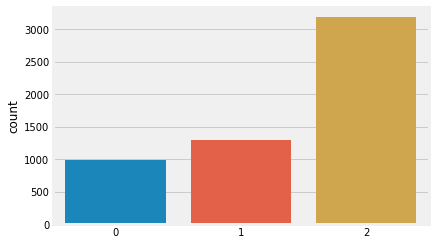

In [ ]:
sns.countplot(y_train)

In [ ]:
train_class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1, 2], y=y_train)
train_class_weights_dict = {
    0: train_class_weights[0], 
    1: train_class_weights[1],
    2: train_class_weights[2]
}

train_class_weights_dict

{0: 1.8410618279569892, 1: 1.4027137736815156, 2: 0.5734170591313449}

## Models selection

Useful resources:
1. https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

2. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

In [ ]:
# models_dict = {
#     # 'Random Forest': Pipeline([('Min max scaler', MinMaxScaler(feature_range=(0.2, 0.8))),
#     #                           ('Random forest classifier', RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict))]),
#     'Random Forest': RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict),
#     'Logistic': LogisticRegression(n_jobs=-1, class_weight=train_class_weights_dict),
#     'K-Neighbors': KNeighborsClassifier(n_jobs=-1),
#     'Support Vector': SVC(class_weight=train_class_weights_dict),
#     'Decision Tree': DecisionTreeClassifier(random_state=7, class_weight=train_class_weights_dict),
#     'Gradient Boosting': GradientBoostingClassifier(random_state=7),
#     'Ada Boost': AdaBoostClassifier(random_state=7),
#     'Extreme Gradient Boosting': XGBClassifier(random_state=7),
#     'Light Gradient Boosting Machine': LGBMClassifier(random_state=7, class_weight=train_class_weights_dict),
#     'Cat boost': CatBoostClassifier(random_state=7, class_weights=train_class_weights_dict)
# }


# # Initiate results dataframe
# models_comparison_results_dict = {}

# for model_name, model in models_dict.items():
#     # Display current model
#     print(f'Trying {model_name}: ')

#     # Define scorer
#     f1_weighted_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True,
#                                             average='weighted') # Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

#     # Get cross validation score
#     f1_weighted_cross_validation_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=f1_weighted_scorer, 
#                                                                 cv=StratifiedKFold(10), # For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 
#                                                                 n_jobs=-1, verbose=100)
    
#     accuracy_cross_validation_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='balanced_accuracy', 
#                                                                 cv=StratifiedKFold(10), # For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 
#                                                                 n_jobs=-1, verbose=100)

#     # Display
#     print(f'{f1_weighted_cross_validation_score.mean():.3f}')

#     models_comparison_results_dict.setdefault('Classifier model', []).append(model_name)
#     models_comparison_results_dict.setdefault('Mean weighted F1 score', []).append(f1_weighted_cross_validation_score.mean())
#     models_comparison_results_dict.setdefault('Std weighted F1 score', []).append(f1_weighted_cross_validation_score.std())

#     models_comparison_results_dict.setdefault('Balanced accuracy', []).append(accuracy_cross_validation_score.mean())
#     models_comparison_results_dict.setdefault('Std in balanced accuracy', []).append(accuracy_cross_validation_score.std())

# # Convert results to dataframe
# models_comparison_results_df = pd.DataFrame.from_dict(models_comparison_results_dict)    

# # Sort based on weighted F-1 score 
# models_comparison_results_df.sort_values(by='Mean weighted F1 score', ascending=False, inplace=True, ignore_index=True)

# # Display
# display(models_comparison_results_df)

# # Save results
# save_path = '/content/drive/MyDrive/DDP/Stored data/GFA/models_comparison_results_df.csv'
# models_comparison_results_df.to_csv(save_path)

In [ ]:
# Load model comparison results
saved_path = '/content/drive/MyDrive/DDP/Stored data/GFA/models_comparison_results_df.csv'
models_comparison_results_df = pd.read_csv(saved_path, index_col=0)

# Set indices to start from 1
models_comparison_results_df.index += 1

# Display
models_comparison_results_df

,Classifier model,Mean weighted F1 score,Std weighted F1 score,Balanced accuracy,Std in balanced accuracy
1,Random Forest,0.888434,0.010745,0.865539,0.014523
2,Light Gradient Boosting Machine,0.887417,0.012950,0.883576,0.015428
3,Cat boost,0.884109,0.014194,0.883350,0.016218
4,K-Neighbors,0.851367,0.015683,0.823048,0.017642
5,Gradient Boosting,0.844676,0.013791,0.805615,0.016530
6,Decision Tree,0.839643,0.013151,0.827381,0.016014
7,Extreme Gradient Boosting,0.837006,0.013235,0.796065,0.017764
8,Support Vector,0.756293,0.011369,0.792464,0.008782
9,Ada Boost,0.735867,0.033646,0.678640,0.039800
10,Logistic,NaN,NaN,NaN,NaN


## Functions for performance summary

In [ ]:
def plot_label_distributions(y_actual_series, y_estimated_series, data_set_name='Train'):
    """
    - Tejas Chaudhari
    """
    # Get actual train labels dataframe
    train_actual_labels_distributions_df = pd.DataFrame()
    train_actual_labels_distributions_df['Labels'] = y_actual_series
    train_actual_labels_distributions_df['Actual/estimated'] = 'Actual'

    # Get predicted train labels dataframe
    train_estimated_labels_distributions_df = pd.DataFrame()
    train_estimated_labels_distributions_df['Labels'] = y_estimated_series
    train_estimated_labels_distributions_df['Actual/estimated'] = 'Estimated'

    # Merge actual and predicted
    train_labels_distributions_df = pd.concat([train_actual_labels_distributions_df, train_estimated_labels_distributions_df], axis=0)

    # Plot
    sns.countplot(data=train_labels_distributions_df, x='Labels', hue='Actual/estimated', palette='tab10')
    plt.title(f'Label distributions for {data_set_name} data')
    plt.show()

In [ ]:
def get_classification_performance_summary(fitted_model, X_train, X_test, y_train, y_test, target_classes_dict):
    """
    - Tejas Chaudhari
    """

    # Get predictions on train data
    y_train_estimated_series = pd.Series(fitted_model.predict(X_train), index=X_train.index)

    # Get predictions on test data
    y_test_estimated_series = pd.Series(fitted_model.predict(X_test), index=X_test.index)

    # Get confurion matrix array on train data
    train_confusion_matrix_array = metrics.confusion_matrix(y_true=y_train, y_pred=y_train_estimated_series, labels=list(target_classes_dict.keys()))

    # Convert to dataframe
    train_confusion_matrix_df = pd.DataFrame(train_confusion_matrix_array, columns=list(target_classes_dict.values()))

    # Plot train confusion matrix
    sns.heatmap(train_confusion_matrix_df, yticklabels=list(target_classes_dict.values()),  annot=True, fmt='.0f')
    plt.title('Confusion matrix for train data')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    print('--'*50)

    # Get confurion matrix array on test data
    test_confusion_matrix_array = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_estimated_series, labels=list(target_classes_dict.keys()))

    # Convert to dataframe
    test_confusion_matrix_df = pd.DataFrame(test_confusion_matrix_array, columns=list(target_classes_dict.values()))

    # Plot test confusion matrix
    sns.heatmap(test_confusion_matrix_df, yticklabels=list(target_classes_dict.values()),  annot=True, fmt='.0f')
    plt.title('Confusion matrix for test data')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    print('__'*50, '\n')

    # Get and display classification report for train data
    train_classification_report = metrics.classification_report(y_true=y_train, y_pred=y_train_estimated_series)
    print('Classification report for train data:')
    print(train_classification_report)
    print('--'*50)

    # Get and display classification report for test data
    test_classification_report = metrics.classification_report(y_true=y_test, y_pred=y_test_estimated_series)
    print('Classification report for test data:')
    print(test_classification_report)
    print('__'*50, '\n')

    # Plot train label distribution
    plot_label_distributions(y_train, y_train_estimated_series, data_set_name='Train')
    print('--'*50)

    # Plot test label distribution
    plot_label_distributions(y_test, y_test_estimated_series, data_set_name='Test')

## Random Forest classifier


### Initial features CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['All']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['All']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['All'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 94


In [ ]:
# Create validation model instance
fitted_initial_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_initial_CV_model_dict.joblib'
dump(fitted_initial_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   23.9s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.5s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_initial_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_initial_CV_model_dict.joblib'
fitted_initial_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_initial_CV_model_df = pd.DataFrame.from_dict(fitted_initial_CV_model_dict)

# Display
fitted_initial_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,5.353976,0.033042,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.883174,0.999797
1,5.390640,0.036790,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.883926,1.000000
2,5.381465,0.032509,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.889733,0.999797
3,5.347944,0.035209,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.895376,0.999797
4,5.342176,0.037424,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875492,1.000000
5,5.286553,0.037747,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875276,0.999797
6,5.250012,0.032168,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.904041,0.999797
7,5.296721,0.036677,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.903737,0.999797
8,5.296413,0.030175,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.876003,0.999797
9,5.294438,0.037204,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.897579,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_initial_CV_model_dict['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_initial_CV_model_dict['test_score'].std()}")


Mean Weighted F-1 cross validation score: 0.8884337056681197
Std Weighted F-1 cross validation score: 0.010744542878916708


### CT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Correlation']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Correlation']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Correlation'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 31


In [ ]:
# Create validation model instance
fitted_CT_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_CT_CV_model_dict.joblib'
dump(fitted_CT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   13.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_CT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_CT_CV_model_dict.joblib'
fitted_CT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_CT_CV_model_df = pd.DataFrame.from_dict(fitted_CT_CV_model_dict)

# Display
fitted_CT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,3.079032,0.029386,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.883104,0.999797
1,3.116651,0.034248,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.881960,1.000000
2,3.174745,0.034689,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.903027,0.999797
3,3.112446,0.034393,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886545,0.999797
4,3.279520,0.033945,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.869536,1.000000
5,3.193325,0.032562,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886502,0.999797
6,3.019229,0.032202,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.902324,0.999797
7,3.051110,0.033986,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.898129,0.999797
8,3.079041,0.031090,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.878192,0.999797
9,3.030446,0.036294,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886357,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_CT_CV_model_df['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_CT_CV_model_df['test_score'].std()}")

Mean Weighted F-1 cross validation score: 0.887567654437696
Std Weighted F-1 cross validation score: 0.010730784598132214


### VT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 19


In [ ]:
# Create validation model instance
fitted_VT_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_CV_model_dict.joblib'
dump(fitted_VT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   11.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.2s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_CV_model_dict.joblib'
fitted_VT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_CV_model_df = pd.DataFrame.from_dict(fitted_VT_CV_model_dict)

# Display
fitted_VT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,2.497757,0.029709,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.883363,0.999797
1,2.587207,0.037508,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.868732,1.000000
2,2.504977,0.029376,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.888400,0.999797
3,2.490350,0.032246,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.888117,0.999797
4,2.594415,0.042561,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.859969,1.000000
5,2.644609,0.076001,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875537,0.999797
6,2.595677,0.030349,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.900671,0.999797
7,2.555304,0.038909,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.903848,0.999797
8,2.497813,0.029457,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.879431,0.999797
9,2.478172,0.042626,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.883047,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_VT_CV_model_df['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_VT_CV_model_df['test_score'].std()}")

Mean Weighted F-1 cross validation score: 0.883111425481502
Std Weighted F-1 cross validation score: 0.013352854056848431


### MIT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Mutual info'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 28


In [ ]:
# Create validation model instance
fitted_MIT_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_CV_model_dict.joblib'
dump(fitted_MIT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   13.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.6s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_CV_model_dict.joblib'
fitted_MIT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_CV_model_dict)

# Display
fitted_MIT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,3.134510,0.039039,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.877660,0.999797
1,2.968223,0.028629,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.874028,1.000000
2,3.029265,0.029030,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.899029,0.999797
3,3.041797,0.039362,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.892275,0.999797
4,3.195315,0.029086,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.880430,1.000000
5,3.218384,0.042530,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886759,0.999797
6,3.006012,0.029376,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.900166,0.999797
7,2.996690,0.040668,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.896106,0.999797
8,3.035222,0.029733,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.870600,0.999797
9,2.998781,0.037592,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886328,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_MIT_CV_model_df['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_MIT_CV_model_df['test_score'].std()}")

Mean Weighted F-1 cross validation score: 0.8863380032648989
Std Weighted F-1 cross validation score: 0.010501572094845929


### VT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Variance threshold"])}')

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features seelcted: 19


In [ ]:
# Create RFECV model instance
VT_RFECV_RFC_model = RFECV(estimator=RFC_estimator_model, cv=StratifiedKFold(10), scoring=weighted_f1_scorer,
                                        verbose=100)

# Fit model on train data
fitted_VT_RFECV_RFC_model = VT_RFECV_RFC_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_RFC_model.joblib'
dump(fitted_VT_RFECV_RFC_model, save_path)

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_RFC_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_RFC_model.joblib'
fitted_VT_RFECV_RFC_model = load(saved_path)

OrderedSet(['Eea (ev)_D', 'I1 (ev)_1', 'I1 (ev)_D', 'Tm (K)_1', 'Tm (K)_D', 'AW_D', 'AW_d', 'Rm (nm)_D', 'Gp_D', 'VEC_D', 'sVEC_1', 'pVEC_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'LP_2', 'Tb (K)_D'])

Number of features selected: 18
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,Eea (ev)_D,I1 (ev)_1,I1 (ev)_D,Tm (K)_1,Tm (K)_D,AW_D,AW_d,Rm (nm)_D,Gp_D,VEC_1,VEC_D,sVEC_1,pVEC_1,XP_D,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,LP_2,Tb (K)_D
2422,0.451965,0.612423,0.253000,0.473559,0.324271,0.319328,0.422463,0.441984,0.485599,0.496095,0.454344,0.800000,0.370455,0.272291,0.310745,0.206614,0.307284,0.622284,0.335364
1282,0.433084,0.404755,0.537636,0.336383,0.471695,0.245718,0.335545,0.408801,0.445696,0.304121,0.310536,0.764706,0.609091,0.328116,0.476446,0.201667,0.361745,0.537354,0.318526
3243,0.277598,0.585085,0.314173,0.474214,0.293967,0.269625,0.307735,0.362935,0.346848,0.560521,0.352954,0.771765,0.220455,0.268147,0.301863,0.205910,0.240847,0.746637,0.292455
701,0.347749,0.311507,0.505910,0.340290,0.355567,0.509942,0.427799,0.664623,0.619427,0.378959,0.565563,0.800000,0.234091,0.552054,0.267892,0.225394,0.412961,0.404650,0.318054
256,0.395954,0.441074,0.370503,0.483461,0.408567,0.282533,0.276108,0.439271,0.543974,0.457701,0.579059,0.701176,0.200000,0.453454,0.376707,0.215576,0.725915,0.442039,0.495620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,0.350511,0.602839,0.300582,0.492570,0.364039,0.341157,0.445202,0.488322,0.457725,0.507158,0.451876,0.785882,0.295455,0.297028,0.291680,0.207780,0.281128,0.645959,0.389055
2551,0.389218,0.583713,0.295650,0.462040,0.339104,0.330382,0.432234,0.451703,0.381343,0.585249,0.567272,0.800000,0.363636,0.246257,0.319025,0.206276,0.305472,0.652785,0.330945
538,0.503985,0.575644,0.247000,0.399481,0.357265,0.350176,0.369695,0.336560,0.364163,0.688069,0.380907,0.623529,0.200000,0.241576,0.552910,0.202609,0.719206,0.719636,0.301302
1221,0.278197,0.272113,0.341919,0.286019,0.310650,0.588664,0.629477,0.576045,0.729245,0.283297,0.365435,0.800000,0.390909,0.463550,0.396143,0.215585,0.535556,0.452562,0.362081


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,Eea (ev)_D,I1 (ev)_1,I1 (ev)_D,Tm (K)_1,Tm (K)_D,AW_D,AW_d,Rm (nm)_D,Gp_D,VEC_D,sVEC_1,pVEC_1,XP_D,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,LP_2,Tb (K)_D
2422,0.451965,0.612423,0.253000,0.473559,0.324271,0.319328,0.422463,0.441984,0.485599,0.454344,0.800000,0.370455,0.272291,0.310745,0.206614,0.307284,0.622284,0.335364
1282,0.433084,0.404755,0.537636,0.336383,0.471695,0.245718,0.335545,0.408801,0.445696,0.310536,0.764706,0.609091,0.328116,0.476446,0.201667,0.361745,0.537354,0.318526
3243,0.277598,0.585085,0.314173,0.474214,0.293967,0.269625,0.307735,0.362935,0.346848,0.352954,0.771765,0.220455,0.268147,0.301863,0.205910,0.240847,0.746637,0.292455
701,0.347749,0.311507,0.505910,0.340290,0.355567,0.509942,0.427799,0.664623,0.619427,0.565563,0.800000,0.234091,0.552054,0.267892,0.225394,0.412961,0.404650,0.318054
256,0.395954,0.441074,0.370503,0.483461,0.408567,0.282533,0.276108,0.439271,0.543974,0.579059,0.701176,0.200000,0.453454,0.376707,0.215576,0.725915,0.442039,0.495620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,0.350511,0.602839,0.300582,0.492570,0.364039,0.341157,0.445202,0.488322,0.457725,0.451876,0.785882,0.295455,0.297028,0.291680,0.207780,0.281128,0.645959,0.389055
2551,0.389218,0.583713,0.295650,0.462040,0.339104,0.330382,0.432234,0.451703,0.381343,0.567272,0.800000,0.363636,0.246257,0.319025,0.206276,0.305472,0.652785,0.330945
538,0.503985,0.575644,0.247000,0.399481,0.357265,0.350176,0.369695,0.336560,0.364163,0.380907,0.623529,0.200000,0.241576,0.552910,0.202609,0.719206,0.719636,0.301302
1221,0.278197,0.272113,0.341919,0.286019,0.310650,0.588664,0.629477,0.576045,0.729245,0.365435,0.800000,0.390909,0.463550,0.396143,0.215585,0.535556,0.452562,0.362081


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using RFC and weighted f1 scoring:     18
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


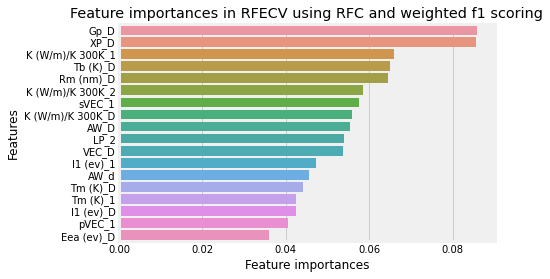

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0     0.492145
1     0.685298
2     0.793504
3     0.828491
4     0.849444
5     0.855066
6     0.862125
7     0.866885
8     0.871115
9     0.868752
10    0.872568
11    0.876096
12    0.879702
13    0.875524
14    0.878958
15    0.877730
16    0.880619
17    0.883129
18    0.883111
dtype: float64

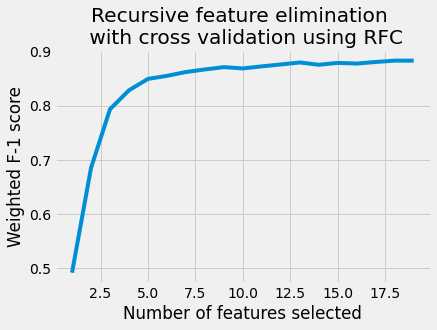

In [ ]:
# Get selected  features list
VT_RFECV_selected_features_list = selected_X_train.loc[:, fitted_VT_RFECV_RFC_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['VT-RFECV'] = OrderedSet(VT_RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['VT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_VT_RFECV_RFC_X_train_df = pd.DataFrame(fitted_VT_RFECV_RFC_model.transform(selected_X_train), 
                                               columns=VT_RFECV_selected_features_list, index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_VT_RFECV_RFC_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using RFC and weighted f1 scoring: \
    {fitted_VT_RFECV_RFC_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_VT_RFECV_RFC_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = VT_RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using RFC and weighted f1 scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_VT_RFECV_RFC_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using RFC')
plt.xlabel('Number of features selected')
plt.ylabel('Weighted F-1 score')

# Display CV grid scores
display(pd.Series(fitted_VT_RFECV_RFC_model.grid_scores_))

#### Performance summary 

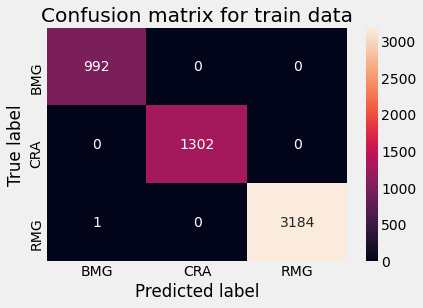

----------------------------------------------------------------------------------------------------


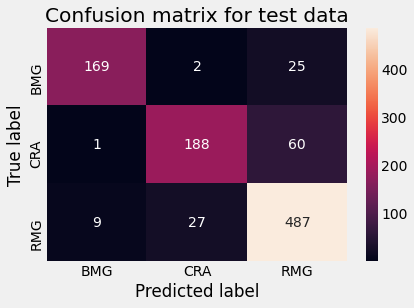

____________________________________________________________________________________________________ 

Classification report for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00      1302
           2       1.00      1.00      1.00      3185

    accuracy                           1.00      5479
   macro avg       1.00      1.00      1.00      5479
weighted avg       1.00      1.00      1.00      5479

----------------------------------------------------------------------------------------------------
Classification report for test data:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       196
           1       0.87      0.76      0.81       249
           2       0.85      0.93      0.89       523

    accuracy                           0.87       968
   macro avg       0.89      0.85      0.87       968
weighted avg  

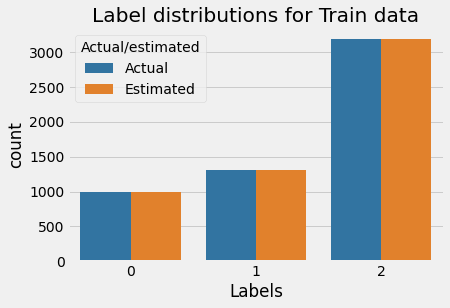

----------------------------------------------------------------------------------------------------


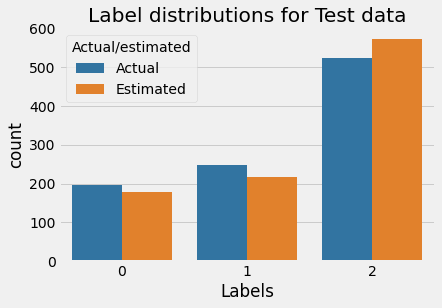

In [ ]:
# Get classification performance summary
get_classification_performance_summary(fitted_model=fitted_VT_RFECV_RFC_model.estimator_, X_train=selected_X_train[selected_feature_subsets_dict['VT-RFECV']],
                                       X_test=selected_X_test[selected_feature_subsets_dict['VT-RFECV']], y_train=y_train, y_test=y_test, 
                                       target_classes_dict=target_classes_dict)

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 18


In [ ]:
# Create validation model instance
fitted_VT_RFECV_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_CV_model_dict.joblib'
dump(fitted_VT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   11.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.9s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_CV_model_dict.joblib'
fitted_VT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_VT_RFECV_CV_model_dict)

# Display
fitted_VT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,2.502588,0.034976,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.885343,0.999797
1,2.492996,0.035016,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.880516,1.000000
2,2.527806,0.029375,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.892128,0.999797
3,2.594800,0.033012,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.884664,0.999797
4,2.518416,0.030018,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.858247,1.000000
5,2.459236,0.032437,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.875816,0.999797
6,2.490592,0.029349,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.896734,0.999797
7,2.463845,0.033607,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.890465,0.999797
8,2.479647,0.029184,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.873174,0.999797
9,2.473513,0.031869,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.881042,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].std()}")


Mean Weighted F-1 cross validation score: 0.8818127453771286
Std Weighted F-1 cross validation score: 0.010453381117806967


### MIT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Mutual info"])}')

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features seelcted: 28


In [ ]:
# Create RFECV model instance
MIT_RFECV_RFC_model = RFECV(estimator=RFC_estimator_model, cv=StratifiedKFold(10), scoring=weighted_f1_scorer,
                                        verbose=100)

# Fit model on train data
fitted_MIT_RFECV_RFC_model = MIT_RFECV_RFC_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_RFC_model.joblib'
dump(fitted_MIT_RFECV_RFC_model, save_path)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 28 features.


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_RFC_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_RFC_model.joblib'
fitted_MIT_RFECV_RFC_model = load(saved_path)

OrderedSet(['S_mix/R', 'Gp_D', 'VEC_D', 'K (W/m)/K 300K_2', 'Rm (nm)_D', 'sVEC_1', 'LP_d', 'XP_D', 'I2 (ev)_D', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'K (W/m)/K 300K_d', 'AW_1', 'Eea (ev)_2', 'AW_D', 'Rm (nm)_1', 'K (W/m)/K 300K_1', 'LP_2', 'I1 (ev)_1', 'Tm (K)_1', 'D_D'])

Number of features selected: 22
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,S_mix/R,Gp_D,VEC_D,VEC_1,K (W/m)/K 300K_2,Rm (nm)_D,sVEC_1,LP_d,XP_D,pVEC_1,I2 (ev)_D,K (W/m)/K 300K_D,Tb (K)_D,H_mix,K (W/m)/K 300K_d,AW_1,Eea (ev)_2,AW_D,Rm (nm)_1,K (W/m)/K 300K_1,LP_2,I1 (ev)_1,Tm (K)_1,I2 (ev)_1,I1 (ev)_D,D_D,AW_d,Eea (ev)_D
2422,0.436073,0.485599,0.454344,0.496095,0.206614,0.441984,0.800000,0.298613,0.272291,0.370455,0.284132,0.307284,0.335364,0.487546,0.305028,0.295675,0.560084,0.319328,0.340139,0.310745,0.622284,0.612423,0.473559,0.518959,0.253000,0.382796,0.422463,0.451965
1282,0.448868,0.445696,0.310536,0.304121,0.201667,0.408801,0.764706,0.250330,0.328116,0.609091,0.230075,0.361745,0.318526,0.531855,0.266775,0.244120,0.527716,0.245718,0.427152,0.476446,0.537354,0.404755,0.336383,0.532614,0.537636,0.295666,0.335545,0.433084
3243,0.330771,0.346848,0.352954,0.560521,0.205910,0.362935,0.771765,0.313710,0.268147,0.220455,0.255193,0.240847,0.292455,0.610791,0.241878,0.326439,0.568657,0.269625,0.368146,0.301863,0.746637,0.585085,0.474214,0.480629,0.314173,0.290714,0.307735,0.277598
701,0.436652,0.619427,0.565563,0.378959,0.225394,0.664623,0.800000,0.265345,0.552054,0.234091,0.292136,0.412961,0.318054,0.481508,0.522511,0.522496,0.526536,0.509942,0.606866,0.267892,0.404650,0.311507,0.340290,0.332351,0.505910,0.320090,0.427799,0.347749
256,0.358227,0.543974,0.579059,0.457701,0.215576,0.439271,0.701176,0.242797,0.453454,0.200000,0.284411,0.725915,0.495620,0.542757,0.540947,0.436001,0.529062,0.282533,0.521670,0.376707,0.442039,0.441074,0.483461,0.405423,0.370503,0.275047,0.276108,0.395954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,0.424491,0.457725,0.451876,0.507158,0.207780,0.488322,0.785882,0.309062,0.297028,0.295455,0.296335,0.281128,0.389055,0.516018,0.293689,0.306325,0.564167,0.341157,0.339282,0.291680,0.645959,0.602839,0.492570,0.535584,0.300582,0.367634,0.445202,0.350511
2551,0.434226,0.381343,0.567272,0.585249,0.206276,0.451703,0.800000,0.302758,0.246257,0.363636,0.272636,0.305472,0.330945,0.483407,0.296606,0.302480,0.523082,0.330382,0.340403,0.319025,0.652785,0.583713,0.462040,0.586755,0.295650,0.416601,0.432234,0.389218
538,0.491003,0.364163,0.380907,0.688069,0.202609,0.336560,0.623529,0.220520,0.241576,0.200000,0.262069,0.719206,0.301302,0.761315,0.373475,0.390596,0.546337,0.350176,0.412222,0.552910,0.719636,0.575644,0.399481,0.564811,0.247000,0.273759,0.369695,0.503985
1221,0.425694,0.729245,0.365435,0.283297,0.215585,0.576045,0.800000,0.295766,0.463550,0.390909,0.300322,0.535556,0.362081,0.436649,0.396360,0.398623,0.530693,0.588664,0.569116,0.396143,0.452562,0.272113,0.286019,0.430734,0.341919,0.333657,0.629477,0.278197


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,S_mix/R,Gp_D,VEC_D,K (W/m)/K 300K_2,Rm (nm)_D,sVEC_1,LP_d,XP_D,I2 (ev)_D,K (W/m)/K 300K_D,Tb (K)_D,H_mix,K (W/m)/K 300K_d,AW_1,Eea (ev)_2,AW_D,Rm (nm)_1,K (W/m)/K 300K_1,LP_2,I1 (ev)_1,Tm (K)_1,D_D
2422,0.436073,0.485599,0.454344,0.206614,0.441984,0.800000,0.298613,0.272291,0.284132,0.307284,0.335364,0.487546,0.305028,0.295675,0.560084,0.319328,0.340139,0.310745,0.622284,0.612423,0.473559,0.382796
1282,0.448868,0.445696,0.310536,0.201667,0.408801,0.764706,0.250330,0.328116,0.230075,0.361745,0.318526,0.531855,0.266775,0.244120,0.527716,0.245718,0.427152,0.476446,0.537354,0.404755,0.336383,0.295666
3243,0.330771,0.346848,0.352954,0.205910,0.362935,0.771765,0.313710,0.268147,0.255193,0.240847,0.292455,0.610791,0.241878,0.326439,0.568657,0.269625,0.368146,0.301863,0.746637,0.585085,0.474214,0.290714
701,0.436652,0.619427,0.565563,0.225394,0.664623,0.800000,0.265345,0.552054,0.292136,0.412961,0.318054,0.481508,0.522511,0.522496,0.526536,0.509942,0.606866,0.267892,0.404650,0.311507,0.340290,0.320090
256,0.358227,0.543974,0.579059,0.215576,0.439271,0.701176,0.242797,0.453454,0.284411,0.725915,0.495620,0.542757,0.540947,0.436001,0.529062,0.282533,0.521670,0.376707,0.442039,0.441074,0.483461,0.275047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700,0.424491,0.457725,0.451876,0.207780,0.488322,0.785882,0.309062,0.297028,0.296335,0.281128,0.389055,0.516018,0.293689,0.306325,0.564167,0.341157,0.339282,0.291680,0.645959,0.602839,0.492570,0.367634
2551,0.434226,0.381343,0.567272,0.206276,0.451703,0.800000,0.302758,0.246257,0.272636,0.305472,0.330945,0.483407,0.296606,0.302480,0.523082,0.330382,0.340403,0.319025,0.652785,0.583713,0.462040,0.416601
538,0.491003,0.364163,0.380907,0.202609,0.336560,0.623529,0.220520,0.241576,0.262069,0.719206,0.301302,0.761315,0.373475,0.390596,0.546337,0.350176,0.412222,0.552910,0.719636,0.575644,0.399481,0.273759
1221,0.425694,0.729245,0.365435,0.215585,0.576045,0.800000,0.295766,0.463550,0.300322,0.535556,0.362081,0.436649,0.396360,0.398623,0.530693,0.588664,0.569116,0.396143,0.452562,0.272113,0.286019,0.333657


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using RFC and weighted f1 scoring:     22
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Features,Feature importances
19,I1 (ev)_1,0.032218
20,Tm (K)_1,0.032350
5,sVEC_1,0.034907
18,LP_2,0.036006
9,K (W/m)/K 300K_D,0.036675
13,AW_1,0.036967
21,D_D,0.037217
2,VEC_D,0.037262
15,AW_D,0.037267
6,LP_d,0.038435


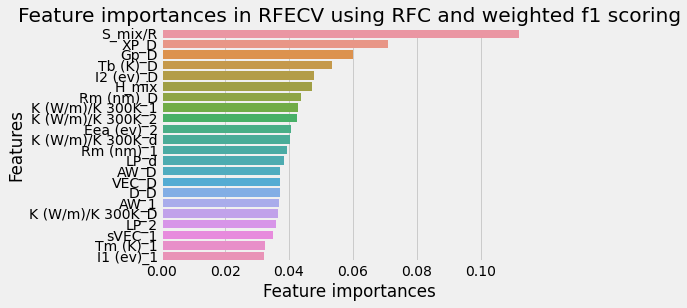

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0     0.495127
1     0.685468
2     0.795029
3     0.831989
4     0.848706
5     0.858641
6     0.867466
7     0.871415
8     0.875170
9     0.877226
10    0.874734
11    0.877175
12    0.878172
13    0.881582
14    0.877983
15    0.882375
16    0.880593
17    0.883848
18    0.883158
19    0.884022
20    0.886515
21    0.887825
22    0.887269
23    0.884721
24    0.887521
25    0.886671
26    0.886370
27    0.886338
dtype: float64

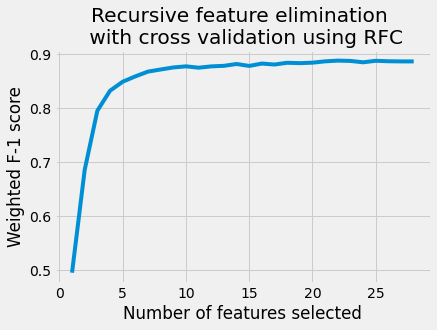

In [ ]:
# Get selected  features list
MIT_RFECV_selected_features_list = selected_X_train.loc[:, fitted_MIT_RFECV_RFC_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['MIT-RFECV'] = OrderedSet(MIT_RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['MIT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_MIT_RFECV_RFC_X_train_df = pd.DataFrame(fitted_MIT_RFECV_RFC_model.transform(selected_X_train), 
                                                columns=MIT_RFECV_selected_features_list, index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_MIT_RFECV_RFC_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using RFC and weighted f1 scoring: \
    {fitted_MIT_RFECV_RFC_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_MIT_RFECV_RFC_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = MIT_RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)

# Display 
display(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False))

# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using RFC and weighted f1 scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_MIT_RFECV_RFC_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using RFC')
plt.xlabel('Number of features selected')
plt.ylabel('Weighted F-1 score')

# Display CV grid scores
display(pd.Series(fitted_MIT_RFECV_RFC_model.grid_scores_))

#### Performance summary 

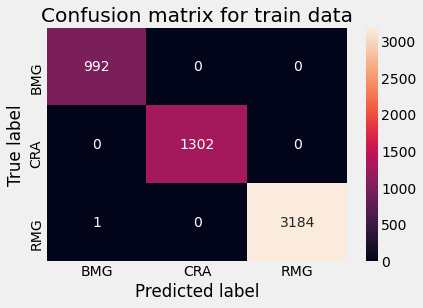

----------------------------------------------------------------------------------------------------


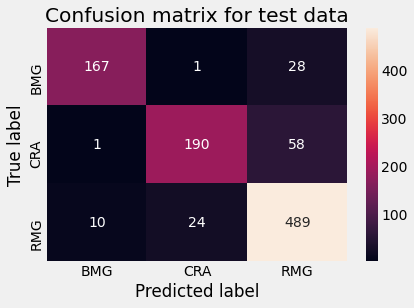

____________________________________________________________________________________________________ 

Classification report for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00      1302
           2       1.00      1.00      1.00      3185

    accuracy                           1.00      5479
   macro avg       1.00      1.00      1.00      5479
weighted avg       1.00      1.00      1.00      5479

----------------------------------------------------------------------------------------------------
Classification report for test data:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       196
           1       0.88      0.76      0.82       249
           2       0.85      0.93      0.89       523

    accuracy                           0.87       968
   macro avg       0.89      0.85      0.87       968
weighted avg  

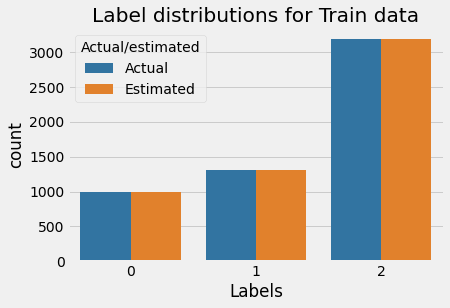

----------------------------------------------------------------------------------------------------


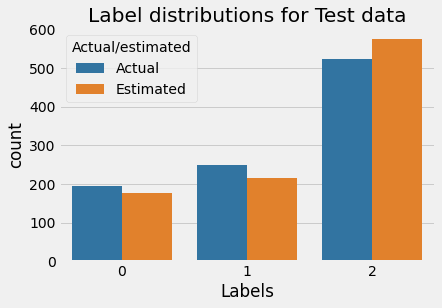

In [ ]:
# Get classification performance summary
get_classification_performance_summary(fitted_model=fitted_MIT_RFECV_RFC_model.estimator_, X_train=selected_X_train[selected_feature_subsets_dict['MIT-RFECV']],
                                       X_test=selected_X_test[selected_feature_subsets_dict['MIT-RFECV']], y_train=y_train, y_test=y_test, 
                                       target_classes_dict=target_classes_dict)

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

Number of features selected: 22


In [ ]:
# Create validation model instance
fitted_MIT_RFECV_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
                                              cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_CV_model_dict.joblib'
dump(fitted_MIT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   12.6s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.3s finished


['/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_CV_model_dict.joblib'
fitted_MIT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_RFECV_CV_model_dict)

# Display
fitted_MIT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,2.524509,0.029330,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.881376,0.999797
1,2.594412,0.033323,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.886040,1.000000
2,2.539520,0.030889,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.889944,0.999797
3,2.490218,0.032585,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.897779,0.999797
4,2.601934,0.030532,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.878337,1.000000
5,2.553651,0.032834,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.879142,0.999797
6,2.527414,0.030267,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.890460,0.999797
7,2.545926,0.034131,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.895891,0.999797
8,2.550916,0.029507,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.871011,0.999797
9,2.507922,0.034075,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.891996,0.999797


In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].std()}")


Mean Weighted F-1 cross validation score: 0.8861975645331481
Std Weighted F-1 cross validation score: 0.00812043490277575


### Optimization

Useful resources:
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

2. https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

3. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

#### VT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

##### Randomized search cv

In [ ]:
# # Number of trees in random forest
# n_estimators_list = np.arange(start=1, stop=150, step=10, dtype=int)
# # Function to measure quality of split
# criterion_list = ['gini', 'entropy']
# # Maximum number of levels in tree
# max_depth_list = np.arange(start=1, stop=30, step=1, dtype=int)
# np.append(arr=max_depth_list, values=None)
# # Minimum number of samples required to split a node
# min_samples_split_list = [2, 4, 6, 8, 10, 50, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# # mximum terminal nodes
# max_leaf_nodes_list = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # The number of features to consider when looking for the best split
# max_features_list = np.arange(start=0.05, stop=1.05, step=0.05, dtype=float)
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # f bootstrap is True, the number of samples to draw from X to train each base estimator.
# max_samples_list = np.arange(start=0.1, stop=1.1, step=0.1, dtype=float)
# # Complexity parameter used for Minimal Cost-Complexity Pruning
# ccp_alpha_list = np.arange(start=0.0001, stop=0.001, step=0.00005, dtype=float)

# # Create the random grid
# hyperparams_distributions = {'max_depth': max_depth_list,
#                     'n_estimators': n_estimators_list,
#                     'criterion': ['gini'],
#                     'min_samples_split': min_samples_split_list,
#                     'min_samples_leaf': min_samples_leaf_list,
#                     'max_features': max_features_list,
#                     'bootstrap': [True],
#                     'max_leaf_nodes': max_leaf_nodes_list,
#                     'max_samples': [None],
#                     'ccp_alpha': ccp_alpha_list   
#                     }

# # Use the random grid to search for best hyperparameters
# RFC_randomized_search_cv_model = RandomizedSearchCV(estimator = RFC_estimator_model, param_distributions = hyperparams_distributions, 
#                                                     scoring=weighted_f1_scorer, n_iter = 500, cv = StratifiedKFold(5), verbose=100, random_state=7, n_jobs = -1)
# # Fit the random search model
# fitted_VT_RFECV_randomized_search_cv_model = RFC_randomized_search_cv_model.fit(selected_X_train, y_train)

# # Save model
# save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_randomized_search_cv_model.joblib'
# dump(fitted_VT_RFECV_randomized_search_cv_model, save_path)

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_randomized_search_cv_model.joblib'
fitted_VT_RFECV_randomized_search_cv_model = load(saved_path)

In [ ]:
fitted_VT_RFECV_randomized_search_cv_model.best_score_

0.88364173973248

In [ ]:
fitted_VT_RFECV_randomized_search_cv_model.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0005000000000000001,
 'criterion': 'gini',
 'max_depth': 28,
 'max_features': 0.35000000000000003,
 'max_leaf_nodes': 800,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 91}

In [ ]:
results_df = pd.DataFrame.from_dict(fitted_VT_RFECV_randomized_search_cv_model.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_leaf_nodes,param_max_features,param_max_depth,param_criterion,param_ccp_alpha,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.219445,0.216507,0.042866,0.002560,141,8,15,None,1000,0.4,2,gini,0.0005,True,"{'n_estimators': 141, 'min_samples_split': 8, ...",0.613915,0.653932,0.630751,0.643908,0.647780,0.638057,0.014262,467
1,0.772862,0.113781,0.039748,0.013029,111,6,10,None,600,0.2,1,gini,0.00035,True,"{'n_estimators': 111, 'min_samples_split': 6, ...",0.450989,0.496555,0.459135,0.454271,0.496061,0.471402,0.020501,494
2,2.649684,0.032690,0.017001,0.001048,41,100,30,None,100,0.75,13,gini,0.00095,True,"{'n_estimators': 41, 'min_samples_split': 100,...",0.789087,0.814065,0.781797,0.791401,0.782556,0.791781,0.011737,226
3,2.198357,0.019244,0.023023,0.000723,61,100,25,None,1000,0.4,23,gini,0.00025,True,"{'n_estimators': 61, 'min_samples_split': 100,...",0.803658,0.792347,0.775025,0.800331,0.809104,0.796093,0.011852,200
4,3.187984,0.024156,0.027578,0.000511,61,6,1,None,400,0.4,16,gini,0.0001,True,"{'n_estimators': 61, 'min_samples_split': 6, '...",0.870539,0.883708,0.876572,0.892600,0.884008,0.881486,0.007467,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.697155,0.011582,0.025210,0.000819,81,6,25,None,600,0.55,5,gini,0.00085,True,"{'n_estimators': 81, 'min_samples_split': 6, '...",0.746799,0.747238,0.733763,0.745915,0.752951,0.745333,0.006293,343
496,6.965182,0.072186,0.039798,0.000335,121,6,25,None,800,0.65,23,gini,0.0009,True,"{'n_estimators': 121, 'min_samples_split': 6, ...",0.824070,0.825407,0.799213,0.834339,0.820264,0.820658,0.011674,100
497,0.048076,0.000980,0.003952,0.000101,1,100,35,None,200,0.65,6,gini,0.00085,True,"{'n_estimators': 1, 'min_samples_split': 100, ...",0.697879,0.606243,0.700435,0.743924,0.662223,0.682141,0.045949,432
498,2.278153,0.019259,0.033337,0.000596,101,4,40,None,700,0.25,21,gini,0.0006,True,"{'n_estimators': 101, 'min_samples_split': 4, ...",0.793653,0.800783,0.769233,0.808611,0.799183,0.794293,0.013412,209


##### Grid search cv

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

In [ ]:
# # Number of trees in random forest
# n_estimators_list = np.arange(start=1, stop=150, step=10, dtype=int)
# # Function to measure quality of split
# criterion_list = ['gini', 'entropy']
# # Maximum number of levels in tree
# max_depth_list = np.arange(start=1, stop=30, step=1, dtype=int)
# np.append(arr=max_depth_list, values=None)
# # Minimum number of samples required to split a node
# min_samples_split_list = [2, 4, 6, 8, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
# # Minimum number of samples required at each leaf node
# min_samples_leaf_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# # mximum terminal nodes
# max_leaf_nodes_list = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # The number of features to consider when looking for the best split
# max_features_list = np.arange(start=0.05, stop=1.05, step=0.05, dtype=float)
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # f bootstrap is True, the number of samples to draw from X to train each base estimator.
# max_samples_list = np.arange(start=0.1, stop=1.1, step=0.1, dtype=float)
# # Complexity parameter used for Minimal Cost-Complexity Pruning
# ccp_alpha_list = np.arange(start=0.0001, stop=0.001, step=0.00005, dtype=float)

# # Create the random grid
# hyperparams_grid = {'max_depth': [22],
#                     'n_estimators': [90],
#                     'criterion': ['gini'],
#                     'min_samples_split': [2],
#                     'min_samples_leaf': [1],
#                     'max_features': [0.5],
#                     'bootstrap': [True],
#                     'max_leaf_nodes': [None],
#                     'max_samples': [None],
#                     'ccp_alpha': [0.0]   
#                     }

# # Create grid search cv model
# VT_RFECV_grid_search_cv_model = GridSearchCV(estimator=RFC_estimator_model, param_grid=hyperparams_grid, scoring=weighted_f1_scorer,
#                                              n_jobs=-1, cv=StratifiedKFold(10), verbose=100, return_train_score=True)

# # Fit model on train data
# fitted_VT_RFECV_grid_search_cv_model = VT_RFECV_grid_search_cv_model.fit(selected_X_train, y_train)

# # Save model
# save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_grid_search_cv_model.joblib'
# dump(fitted_VT_RFECV_grid_search_cv_model, save_path)

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_VT_RFECV_grid_search_cv_model.joblib'
fitted_VT_RFECV_grid_search_cv_model = load(saved_path)

In [ ]:
fitted_VT_RFECV_grid_search_cv_model.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 22,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 90}

In [ ]:
fitted_VT_RFECV_grid_search_cv_model.best_score_

0.8893817109481367

In [ ]:
# Get results
VT_RFECV_grid_search_cv_results_dict = fitted_VT_RFECV_grid_search_cv_model.cv_results_

# Convert to dataframe
VT_RFECV_grid_search_cv_results_df = pd.DataFrame.from_dict(VT_RFECV_grid_search_cv_results_dict)

# Display
VT_RFECV_grid_search_cv_results_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,6.652651,0.023687,0.029932,0.002254,True,0,gini,22,0.5,None,None,1,2,90,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.881318,0.885969,0.896025,0.903344,0.875077,0.879266,0.900459,0.896294,0.889382,0.886683,0.889382,0.008947,1,0.999797,1.0,0.999797,0.999797,1.0,0.999797,0.999797,0.999797,0.999797,0.999797,0.999838,0.000081


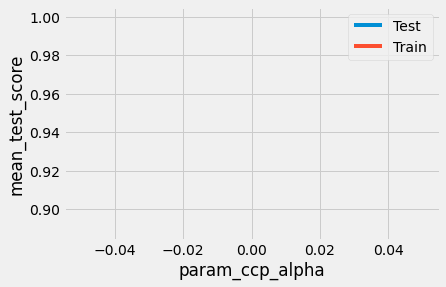

In [ ]:
# Plot
sns.lineplot(data=VT_RFECV_grid_search_cv_results_df, x='param_ccp_alpha', y='mean_test_score', label='Test')
sns.lineplot(data=VT_RFECV_grid_search_cv_results_df, x='param_ccp_alpha', y='mean_train_score', label='Train')
plt.legend()

##### Performance summary

In [ ]:
# Get classification performance summary
get_classification_performance_summary(fitted_model=fitted_VT_RFECV_grid_search_cv_model.best_estimator_, X_train=selected_X_train,
                                       X_test=selected_X_test, y_train=y_train, y_test=y_test, 
                                       target_classes_dict=target_classes_dict)

ValueError: ignored

#### MIT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

##### Randomized search cv

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Use the random grid to search for best hyperparameters
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = RFC_estimator_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=100, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(selected_X_train, y_train)

##### Grid search cv

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = RandomForestClassifier(n_jobs=1, random_state=7, class_weight=train_class_weights_dict)

In [ ]:
# # Number of trees in random forest
# n_estimators_list = np.arange(start=1, stop=150, step=10, dtype=int)
# # Function to measure quality of split
# criterion_list = ['gini', 'entropy']
# # Maximum number of levels in tree
# max_depth_list = np.arange(start=1, stop=30, step=1, dtype=int)
# np.append(arr=max_depth_list, values=None)
# # Minimum number of samples required to split a node
# min_samples_split_list = [2, 4, 6, 8, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
# # Minimum number of samples required at each leaf node
# min_samples_leaf_list = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# # mximum terminal nodes
# max_leaf_nodes_list = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # The number of features to consider when looking for the best split
# max_features_list = np.arange(start=0.05, stop=1.05, step=0.05, dtype=float)
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # f bootstrap is True, the number of samples to draw from X to train each base estimator.
# max_samples_list = np.arange(start=0.1, stop=1.1, step=0.1, dtype=float)
# # Complexity parameter used for Minimal Cost-Complexity Pruning
# ccp_alpha_list = np.arange(start=0.0001, stop=0.001, step=0.00005, dtype=float)

# # Create the random grid
# hyperparams_grid = {'max_depth': [22],
#                     'n_estimators': [90],
#                     'criterion': ['gini'],
#                     'min_samples_split': [2],
#                     'min_samples_leaf': [1],
#                     'max_features': [0.5],
#                     'bootstrap': [True],
#                     'max_leaf_nodes': [None],
#                     'max_samples': [None],
#                     'ccp_alpha': [0.0]   
#                     }

# # Create grid search cv model
# MIT_RFECV_grid_search_cv_model = GridSearchCV(estimator=RFC_estimator_model, param_grid=hyperparams_grid, scoring=weighted_f1_scorer,
#                                              n_jobs=-1, cv=StratifiedKFold(10), verbose=100, return_train_score=True)

# # Fit model on train data
# fitted_MIT_RFECV_grid_search_cv_model = MIT_RFECV_grid_search_cv_model.fit(selected_X_train, y_train)

# # Save model
# save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_grid_search_cv_model.joblib'
# dump(fitted_MIT_RFECV_grid_search_cv_model, save_path)

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_grid_search_cv_model.joblib'
fitted_MIT_RFECV_grid_search_cv_model = load(saved_path)

In [ ]:
fitted_MIT_RFECV_grid_search_cv_model.best_params_

In [ ]:
fitted_MIT_RFECV_grid_search_cv_model.best_score_

In [ ]:
metrics.accuracy_score(y_test, fitted_MIT_RFECV_grid_search_cv_model.best_estimator_.predict(selected_X_test))

In [ ]:
# Get results
MIT_RFECV_grid_search_cv_results_dict = fitted_MIT_RFECV_grid_search_cv_model.cv_results_

# Convert to dataframe
MIT_RFECV_grid_search_cv_results_df = pd.DataFrame.from_dict(MIT_RFECV_grid_search_cv_results_dict)

# Display
MIT_RFECV_grid_search_cv_results_df.sort_values(by='mean_test_score', ascending=False)

In [ ]:
# Plot
sns.lineplot(data=MIT_RFECV_grid_search_cv_results_df, x='param_ccp_alpha', y='mean_test_score', label='Test')
sns.lineplot(data=MIT_RFECV_grid_search_cv_results_df, x='param_ccp_alpha', y='mean_train_score', label='Train')
plt.legend()

##### Performance summary

In [ ]:
# Get classification performance summary
get_classification_performance_summary(fitted_model=fitted_MIT_RFECV_grid_search_cv_model.best_estimator_, X_train=selected_X_train,
                                       X_test=selected_X_test, y_train=y_train, y_test=y_test, 
                                       target_classes_dict=target_classes_dict)

### MIT-RFECV V2

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = fitted_MIT_RFECV_grid_search_cv_model.best_estimator_

In [ ]:
# # Create RFECV model instance
# MIT_RFECV_RFC_model = RFECV(estimator=RFC_estimator_model, cv=StratifiedKFold(10), scoring=weighted_f1_scorer,
#                                         verbose=100)

# # Fit model on train data
# fitted_MIT_RFECV_RFC_model = MIT_RFECV_RFC_model.fit(selected_X_train, y_train)

# # Save model
# save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_RFC_model_V2.joblib'
# dump(fitted_MIT_RFECV_RFC_model, save_path)

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_RFC_model_V2.joblib'
fitted_MIT_RFECV_RFC_model = load(saved_path)

In [ ]:
# Get selected  features list
MIT_RFECV_selected_features_list = selected_X_train.loc[:, fitted_MIT_RFECV_RFC_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['MIT-RFECV'] = OrderedSet(MIT_RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['MIT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_MIT_RFECV_RFC_X_train_df = pd.DataFrame(fitted_MIT_RFECV_RFC_model.transform(selected_X_train), 
                                                columns=MIT_RFECV_selected_features_list, index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_MIT_RFECV_RFC_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using RFC and weighted f1 scoring: \
    {fitted_MIT_RFECV_RFC_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_MIT_RFECV_RFC_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = MIT_RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using RFC and weighted f1 scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_MIT_RFECV_RFC_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using RFC')
plt.xlabel('Number of features selected')
plt.ylabel('Weighted F-1 score')

#### Performance summary 

In [ ]:
# Get classification performance summary
get_classification_performance_summary(fitted_model=fitted_MIT_RFECV_RFC_model.estimator_, X_train=selected_X_train[selected_feature_subsets_dict['MIT-RFECV']],
                                       X_test=selected_X_test[selected_feature_subsets_dict['MIT-RFECV']], y_train=y_train, y_test=y_test, 
                                       target_classes_dict=target_classes_dict)

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")

# Set scoring method
weighted_f1_scorer = metrics.make_scorer(score_func=metrics.f1_score, greater_is_better=True, average='weighted')

# Create RFC estimator model instance
RFC_estimator_model = fitted_MIT_RFECV_grid_search_cv_model.best_estimator_

In [ ]:
# # Create validation model instance
# fitted_MIT_RFECV_CV_model_dict = cross_validate(estimator=RFC_estimator_model, X=selected_X_train, y=y_train, scoring=weighted_f1_scorer, 
#                                               cv=StratifiedKFold(10), n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# # Save fitted  model
# save_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_CV_model_dict_V2.joblib'
# dump(fitted_MIT_RFECV_CV_model_dict, save_path)

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/GFA/fitted_MIT_RFECV_CV_model_dict_V2.joblib'
fitted_MIT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_RFECV_CV_model_dict)

# Display
fitted_MIT_RFECV_CV_model_df

In [ ]:
# Mean weighted F-1 cross validation score
print(f"Mean Weighted F-1 cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std Weighted F-1 cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].std()}")


# Trials

In [ ]:
# def XGB_column_names_cleaner(GFA_data_df):
#     """
#     - Tejas Chaudhari
#     """

#     # Initiate dataframe
#     XGBC_GFA_data_df = GFA_data_df.copy(deep=True)

#     # Script to remove '[', ']', and '<' from column names
#     for i, column_name in enumerate(GFA_data_df.columns):
#         if '(' in column_name or ')' in column_name or '<' in column_name:
#             print('Column name to change: ', column_name)
#             new_column_name = column_name.replace('(', '_').replace(')', '_')
#             XGBC_GFA_data_df.rename(columns={column_name: new_column_name}, inplace=True)
#             print('Changed to: ', XGBC_GFA_data_df.columns[i])
    
#     return XGBC_GFA_data_df

In [ ]:
# # XGBC_hyperparams_dict = {
# #     'booster': ['gbtree', 'gblinear'], # Tree based models or linear based models
# #     'eta': [0.01, 0.05, 0.1, 1.5, 2], # Learning rate
# #     'max_depth': [3, 5, 7, 10]
# # }


# # grid_model = GridSearchCV(XGBClassifier(), param_grid=XGBC_hyperparams_dict)
# model = XGBClassifier()
# fitted_model = model.fit(imputed_X_train_df, encoded_y_train_series)




In [ ]:
# y_train_pred = fitted_model.predict(imputed_X_train_df)
# y_test_pred = fitted_model.predict(imputed_X_test_df)
# print(metrics.classification_report(encoded_y_train_series, y_train_pred))
# print(metrics.classification_report(encoded_y_test_series, y_test_pred))


# feature_importances_list = fitted_model.feature_importances_
# feature_names = imputed_X_train_df.columns


# temp_df = pd.DataFrame()
# temp_df['features'] = feature_names
# temp_df['importances'] = feature_importances_list

# plt.figure(figsize=(15,30))
# sns.barplot(data=temp_df.sort_values(by='importances', ascending=False), 
#             y='features', x='importances')

# display(metrics.balanced_accuracy_score(encoded_y_train_series, y_train_pred))
# display(metrics.balanced_accuracy_score(encoded_y_test_series, y_test_pred))

In [ ]:
# model = RandomForestClassifier()
# fitted_model = model.fit(imputed_X_train_df, encoded_y_train_series)

In [ ]:
# y_train_pred = fitted_model.predict(imputed_X_train_df)
# y_test_pred = fitted_model.predict(imputed_X_test_df)
# print(metrics.classification_report(encoded_y_train_series, y_train_pred))
# print(metrics.classification_report(encoded_y_test_series, y_test_pred))

# print(metrics.roc_auc_score(encoded_y_train_series, fitted_model.predict_proba(imputed_X_train_df), multi_class='ovo', average='weighted'))
# print(metrics.roc_auc_score(encoded_y_test_series, fitted_model.predict_proba(imputed_X_test_df), multi_class='ovo', average='weighted'))


# feature_importances_list = fitted_model.feature_importances_
# feature_names = imputed_X_train_df.columns


# temp_df = pd.DataFrame()
# temp_df['features'] = feature_names
# temp_df['importances'] = feature_importances_list

# plt.figure(figsize=(15,30))
# sns.barplot(data=temp_df.sort_values(by='importances', ascending=False), 
#             y='features', x='importances')

# display(metrics.balanced_accuracy_score(encoded_y_train_series, y_train_pred))
# display(metrics.balanced_accuracy_score(encoded_y_test_series, y_test_pred))

In [ ]:
# model = LGBMClassifier()
# fitted_model = model.fit(X_train, y_train)

In [ ]:
# y_train_pred = fitted_model.predict(X_train)
# y_test_pred = fitted_model.predict(X_test)
# print(metrics.classification_report(y_train, y_train_pred))
# print(metrics.classification_report(y_test, y_test_pred))

# print(metrics.roc_auc_score(y_train, fitted_model.predict_proba(X_train), multi_class='ovo', average='weighted'))
# print(metrics.roc_auc_score(y_test, fitted_model.predict_proba(X_test), multi_class='ovo', average='weighted'))


# feature_importances_list = fitted_model.feature_importances_
# feature_names = X_train.columns


# temp_df = pd.DataFrame()
# temp_df['features'] = feature_names
# temp_df['importances'] = feature_importances_list

# plt.figure(figsize=(15,30))
# sns.barplot(data=temp_df.sort_values(by='importances', ascending=False), 
#             y='features', x='importances')

# display(metrics.balanced_accuracy_score(y_train, y_train_pred))
# display(metrics.balanced_accuracy_score(y_test, y_test_pred))